In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_score


import xgboost as xgb
from xgboost.sklearn import XGBRegressor

import xgboost as xg 
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.linear_model import LinearRegression
# Feature Importance 
import shap

In [2]:
pisa2018_singapore = pd.read_csv('datasets/pisa2018_singapore.csv')

In [3]:
pisa2018_singapore.head()

CNTRYID    CNTSCHID    CNTSTUID                             STRATUM  \
0  Singapore  70200001.0  70200318.0  SGP - stratum 01: Public,Secondary   
1  Singapore  70200001.0  70200654.0  SGP - stratum 01: Public,Secondary   
2  Singapore  70200001.0  70200660.0  SGP - stratum 01: Public,Secondary   
3  Singapore  70200001.0  70200994.0  SGP - stratum 01: Public,Secondary   
4  Singapore  70200001.0  70201373.0  SGP - stratum 01: Public,Secondary   

   EFFORT1  EFFORT2                                     OCOD1  \
0     10.0     10.0                    Teaching professionals   
1      NaN      NaN                     Personal care workers   
2      8.0      9.0  Legal, social and cultural professionals   
3      7.0      3.0                            Not applicable   
4      9.0     10.0    Administrative and commercial managers   

                                               OCOD2  \
0          Business and administration professionals   
1                             Teaching professionals   
2  Chief executives, senior officials and legisla...   
3                 Drivers and mobile plant operators   
4       Production and specialised services managers   

                                               OCOD3  GRADE  ...  \
0                   Graphic and multimedia designers    0.0  ...   
1                          Early childhood educators    0.0  ...   
2  Engineering professionals not elsewhere classi...    0.0  ...   
3  Vague(a good job, a quiet job, a well paid job...   -1.0  ...   
4                                      Travel guides    0.0  ...   

                    UNIT WVARSTRR    SENWT             VER_DAT test GENDER  \
0  final variance unit 1     41.0  0.28939    14AUG19:14:08:12  NaN      0   
1  final variance unit 1     61.0  0.30028    14AUG19:14:08:12  NaN      1   
2  final variance unit 1     11.0  0.28939    14AUG19:14:08:12  NaN      0   
3  final variance unit 2     54.0  0.33367    14AUG19:14:08:12  NaN      0   
4  final variance unit 1     30.0  0.30028    14AUG19:14:08:12  NaN      1   

       MATH   SCIENCE      READ  TOTALSCORE  
0  706.3670  696.1431  772.8338  725.114633  
1  432.0569  418.7334  456.1390  435.643100  
2  600.0765  603.6294  533.6724  579.126100  
3  422.5786  425.4020  403.0926  417.024400  
4  596.1870  603.2735  616.6650  605.375167  

[5 rows x 129 columns]

In [4]:
pisa2018_singapore.describe().round(2).T

count         mean      std          min          25%  \
CNTSCHID    6676.0  70200083.74    47.42  70200001.00  70200043.00   
CNTSTUID    6676.0  70203582.21  2071.02  70200001.00  70201782.75   
EFFORT1     5628.0         7.54     1.89         1.00         7.00   
EFFORT2     5597.0         9.24     1.39         1.00         9.00   
GRADE       6676.0        -0.09     0.34        -3.00         0.00   
...            ...          ...      ...          ...          ...   
GENDER      6676.0         0.49     0.50         0.00         0.00   
MATH        6676.0       568.29    88.37       249.16       510.61   
SCIENCE     6676.0       549.97    93.81       196.01       486.96   
READ        6676.0       548.46   106.93       169.94       478.81   
TOTALSCORE  6676.0       555.57    93.33       232.33       494.16   

                    50%          75%          max  
CNTSCHID    70200085.00  70200124.00  70200166.00  
CNTSTUID    70203583.50  70205372.25  70207170.00  
EFFORT1            8.00         9.00        10.00  
EFFORT2           10.00        10.00        10.00  
GRADE              0.00         0.00         1.00  
...                 ...          ...          ...  
GENDER             0.00         1.00         1.00  
MATH             578.57       633.20       777.50  
SCIENCE          560.93       619.60       805.27  
READ             559.62       627.93       823.40  
TOTALSCORE       566.42       625.18       784.57  

[100 rows x 8 columns]

In [5]:
pisa2018_singapore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6676 entries, 0 to 6675
Columns: 129 entries, CNTRYID to TOTALSCORE
dtypes: float64(99), int64(1), object(29)
memory usage: 6.6+ MB


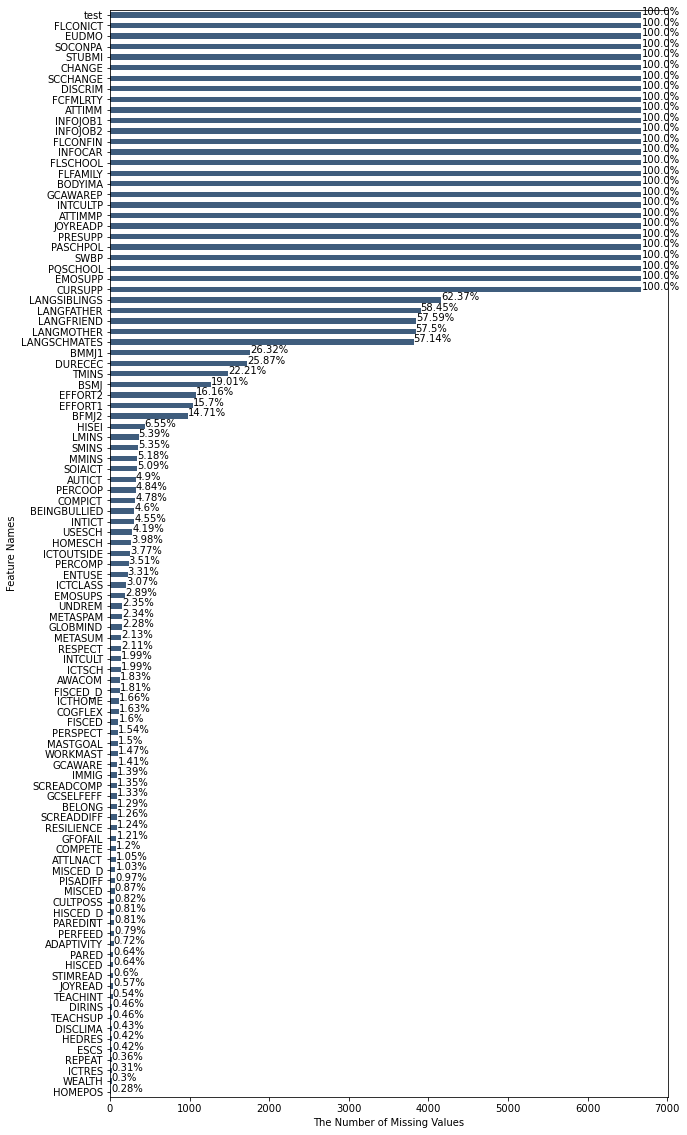

In [6]:
#Checking percentage of null values

Nan = pisa2018_singapore.isnull().sum()[pisa2018_singapore.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 20), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/pisa2018_singapore.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names');

In [7]:
#Drop column with NAN more than 10%
NanPer = len(pisa2018_singapore) *.90
pisa2018_singapore = pisa2018_singapore.dropna(thresh=NanPer, axis=1)

In [8]:
#split data into train and test
train_singapore , test_singapore  = train_test_split(pisa2018_singapore, test_size=0.2, random_state=42)

print(f"No. of training examples: {train_singapore.shape[0]}")
print(f"No. of testing examples: {test_singapore.shape[0]}")

No. of training examples: 5340
No. of testing examples: 1336


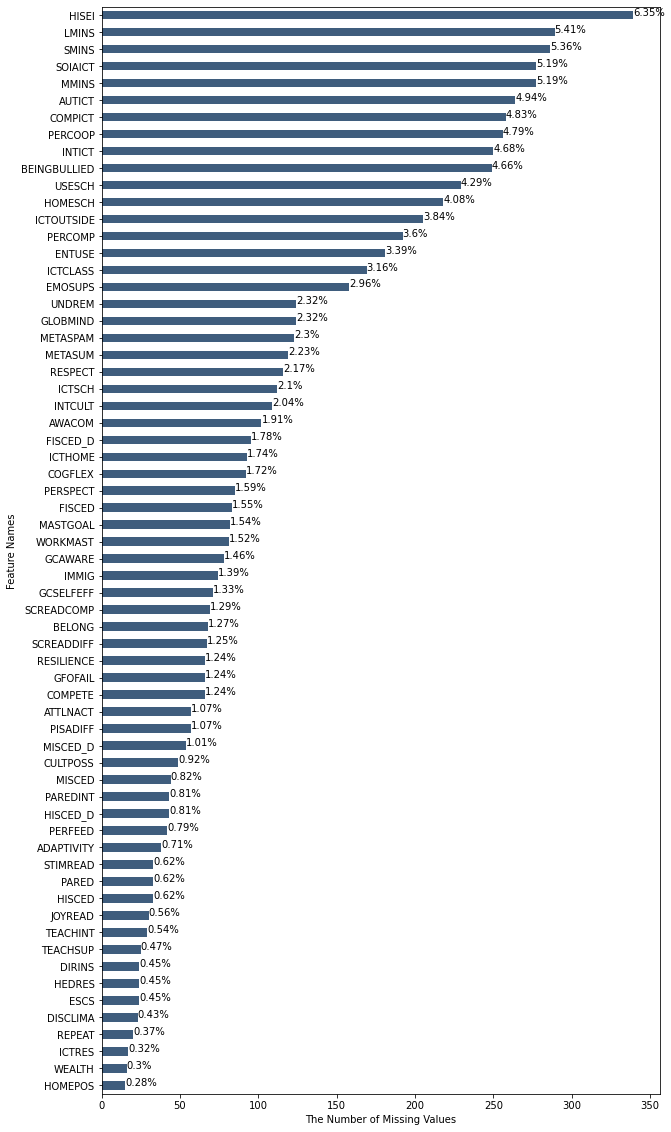

In [9]:
#Checking percentage of null values

Nan = train_singapore.isnull().sum()[train_singapore.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 20), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/train_singapore.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names');

In [10]:
train_singapore['GENDER'] = train_singapore['GENDER'].astype('object')
test_singapore['GENDER'] = test_singapore['GENDER'].astype('object')

In [11]:
#Fill NAN values with train columns' median
numvar = train_singapore.dtypes !="object"
numeric_features = list(numvar[numvar].index)
for col in numeric_features:
    train_singapore[col].fillna(train_singapore[col].median(), inplace=True)
    test_singapore[col].fillna(train_singapore[col].median(), inplace=True)

In [12]:
#Fill NAN values with train columns' mode
obvar = train_singapore.dtypes =="object"
categorical_features = list(obvar[obvar].index)
for col in categorical_features:
    train_singapore[col].fillna(train_singapore[col].mode()[0], inplace=True)
    test_singapore[col].fillna(train_singapore[col].mode()[0], inplace=True)

In [13]:
categorical_features

['CNTRYID',
 'STRATUM',
 'OCOD1',
 'OCOD2',
 'OCOD3',
 'PROGN',
 'COBN_S',
 'COBN_M',
 'COBN_F',
 'LANGN',
 'ISCEDL',
 'ISCEDD',
 'ISCEDO',
 'MISCED',
 'FISCED',
 'HISCED',
 'MISCED_D',
 'FISCED_D',
 'HISCED_D',
 'IMMIG',
 'REPEAT',
 'UNIT',
 'VER_DAT',
 'GENDER']

In [14]:
train_singapore.isnull().sum().sum(),test_singapore.isnull().sum().sum()

(0, 0)

In [15]:
list(train_singapore.columns)

['CNTRYID',
 'CNTSCHID',
 'CNTSTUID',
 'STRATUM',
 'OCOD1',
 'OCOD2',
 'OCOD3',
 'GRADE',
 'AGE',
 'PROGN',
 'COBN_S',
 'COBN_M',
 'COBN_F',
 'LANGN',
 'ISCEDL',
 'ISCEDD',
 'ISCEDO',
 'MISCED',
 'FISCED',
 'HISCED',
 'PARED',
 'MISCED_D',
 'FISCED_D',
 'HISCED_D',
 'PAREDINT',
 'HISEI',
 'IMMIG',
 'REPEAT',
 'MMINS',
 'LMINS',
 'SMINS',
 'ESCS',
 'UNDREM',
 'METASUM',
 'METASPAM',
 'ICTHOME',
 'ICTSCH',
 'HOMEPOS',
 'CULTPOSS',
 'HEDRES',
 'WEALTH',
 'ICTRES',
 'DISCLIMA',
 'TEACHSUP',
 'DIRINS',
 'PERFEED',
 'EMOSUPS',
 'STIMREAD',
 'ADAPTIVITY',
 'TEACHINT',
 'JOYREAD',
 'SCREADCOMP',
 'SCREADDIFF',
 'PISADIFF',
 'PERCOMP',
 'PERCOOP',
 'ATTLNACT',
 'COMPETE',
 'WORKMAST',
 'GFOFAIL',
 'RESILIENCE',
 'MASTGOAL',
 'GCSELFEFF',
 'GCAWARE',
 'INTCULT',
 'PERSPECT',
 'COGFLEX',
 'RESPECT',
 'AWACOM',
 'GLOBMIND',
 'BELONG',
 'BEINGBULLIED',
 'ENTUSE',
 'HOMESCH',
 'USESCH',
 'INTICT',
 'COMPICT',
 'AUTICT',
 'SOIAICT',
 'ICTCLASS',
 'ICTOUTSIDE',
 'UNIT',
 'WVARSTRR',
 'SENWT',
 'VER_DA

In [16]:
train_singapore.set_index('CNTSTUID', inplace=True)
test_singapore.set_index('CNTSTUID', inplace=True)

In [17]:
train_singapore.drop(columns=['CNTRYID','CNTSCHID','STRATUM','OCOD1','OCOD2','OCOD3','PROGN','COBN_S',
                                'COBN_M','COBN_F','LANGN','UNIT', 'VER_DAT', 'SENWT'], axis =1, inplace = True)
test_singapore.drop(columns=['CNTRYID','CNTSCHID','STRATUM','OCOD1','OCOD2','OCOD3','PROGN','COBN_S',
                                'COBN_M','COBN_F','LANGN','UNIT', 'VER_DAT', 'SENWT'], axis =1, inplace = True)

In [18]:
train_singapore.shape, test_singapore.shape

((5340, 75), (1336, 75))

In [19]:
obvar = train_singapore.dtypes =="object"
categorical_features = list(obvar[obvar].index)
categorical_features

['ISCEDL',
 'ISCEDD',
 'ISCEDO',
 'MISCED',
 'FISCED',
 'HISCED',
 'MISCED_D',
 'FISCED_D',
 'HISCED_D',
 'IMMIG',
 'REPEAT']

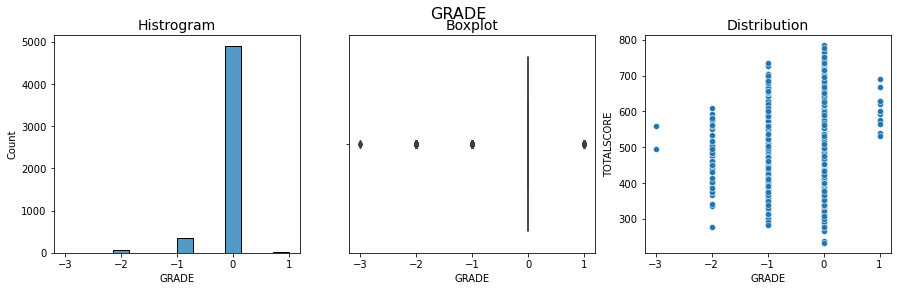

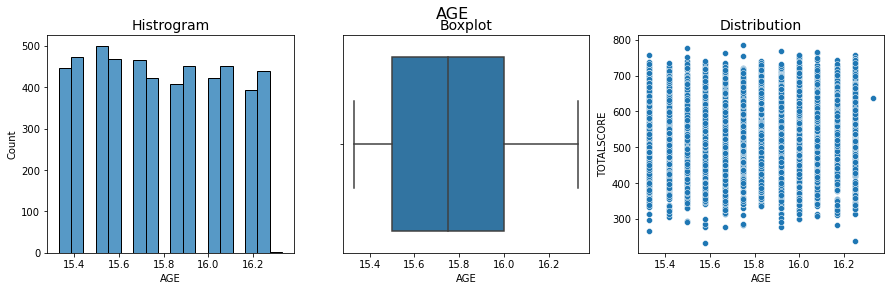

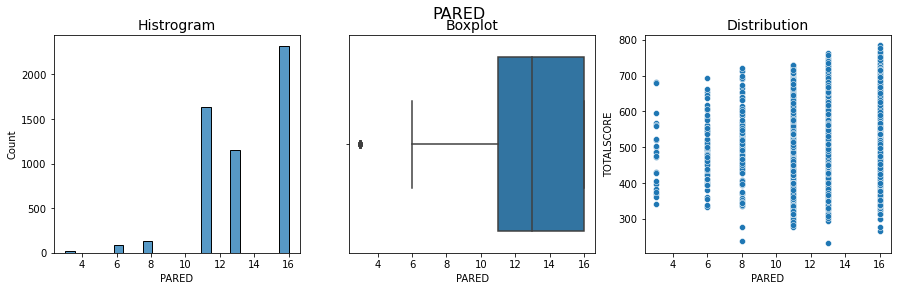

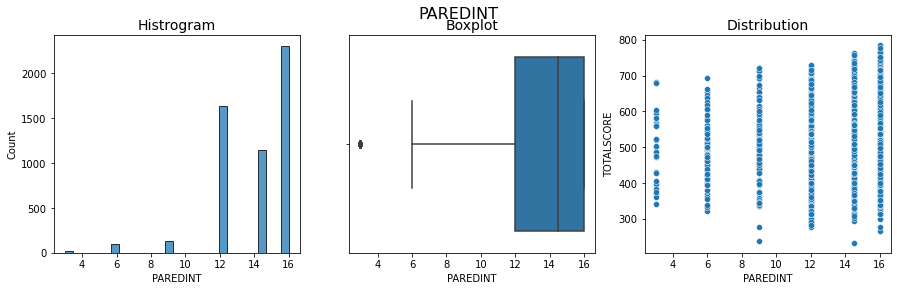

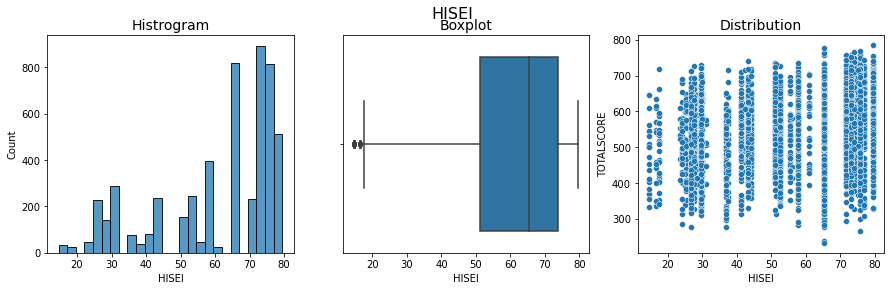

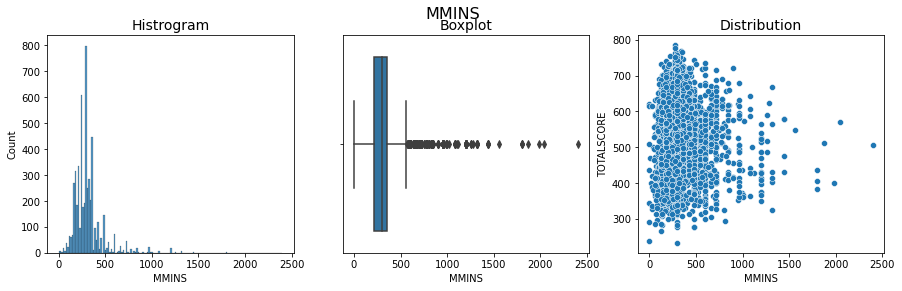

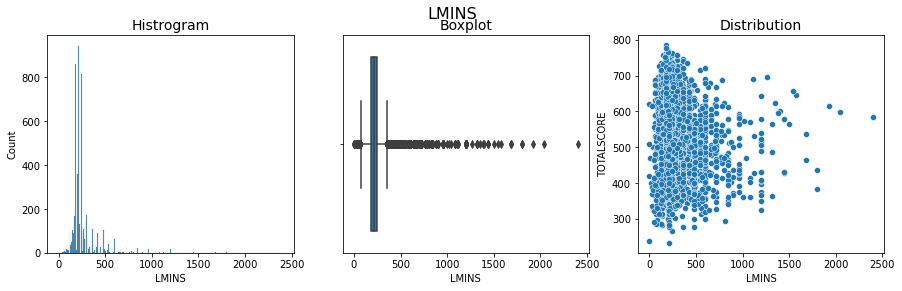

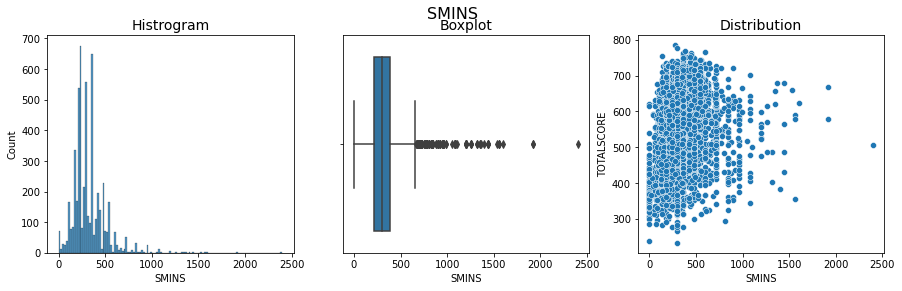

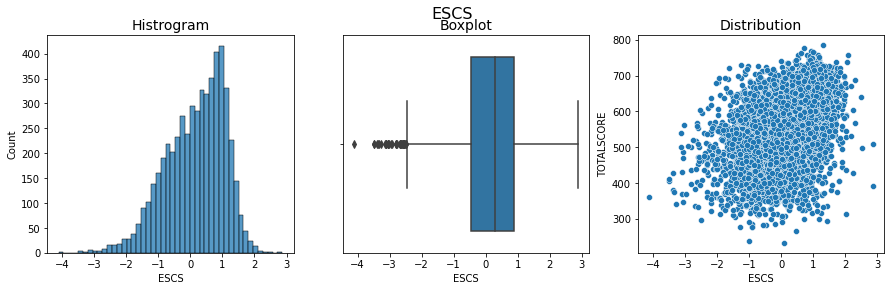

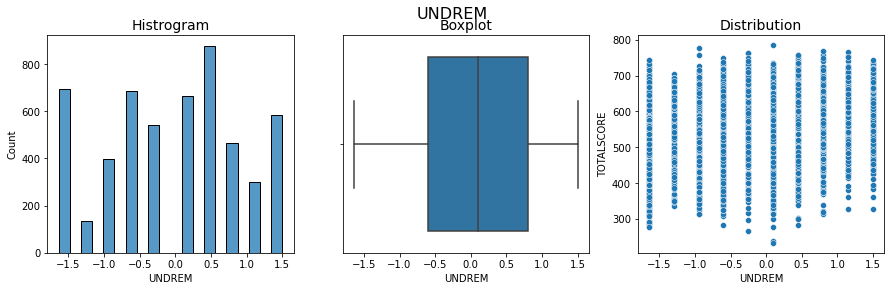

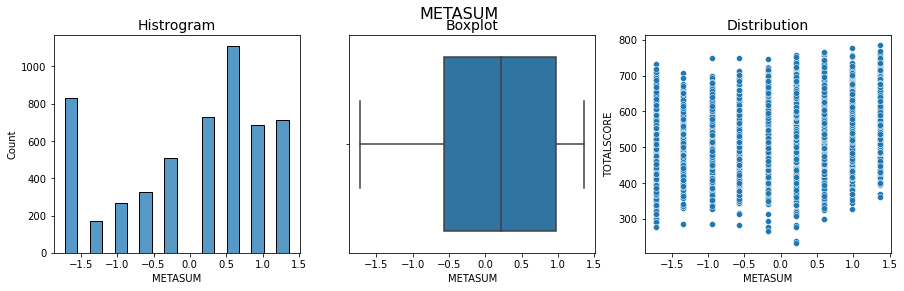

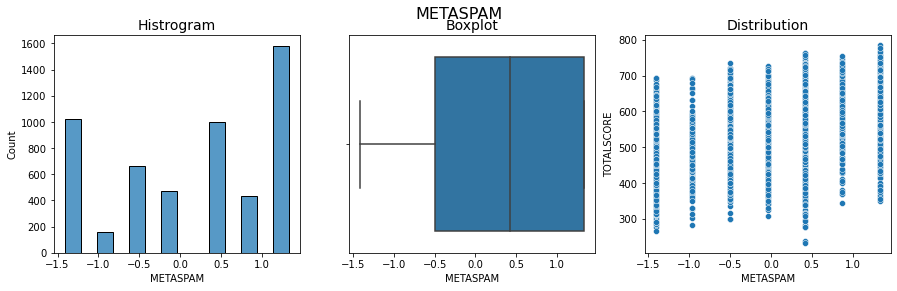

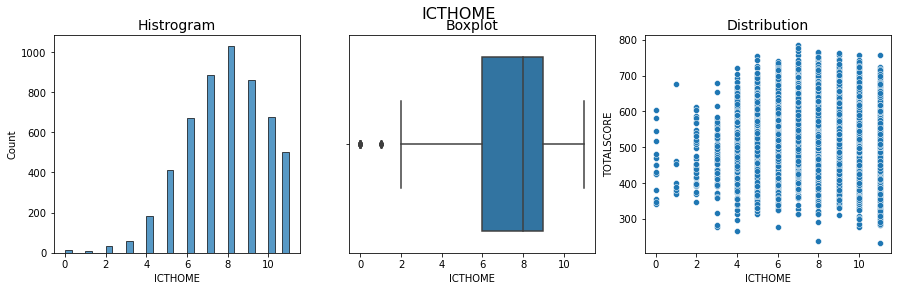

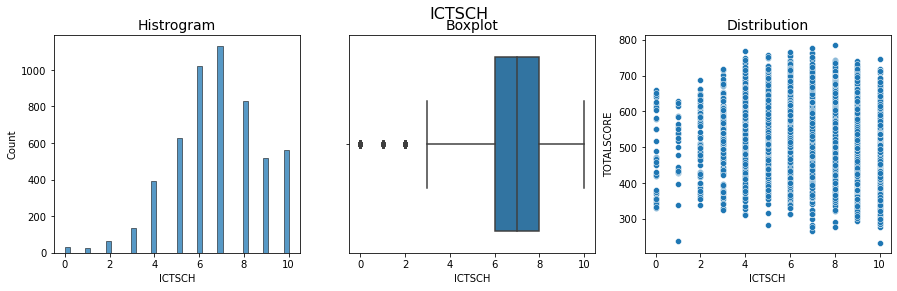

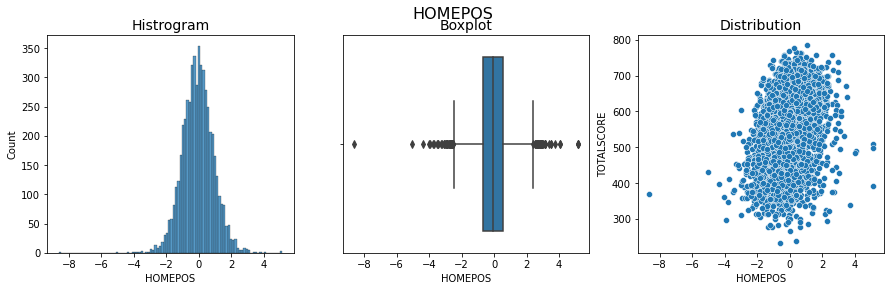

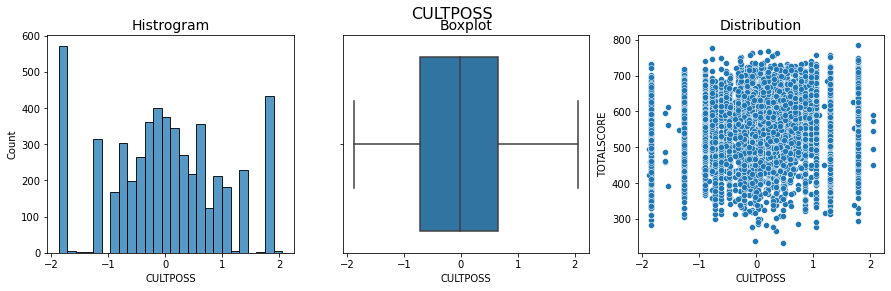

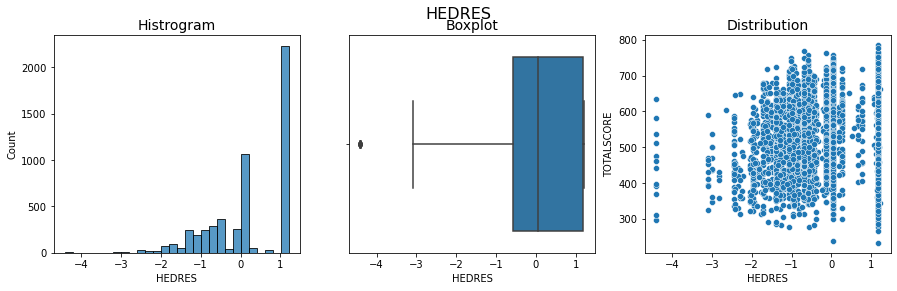

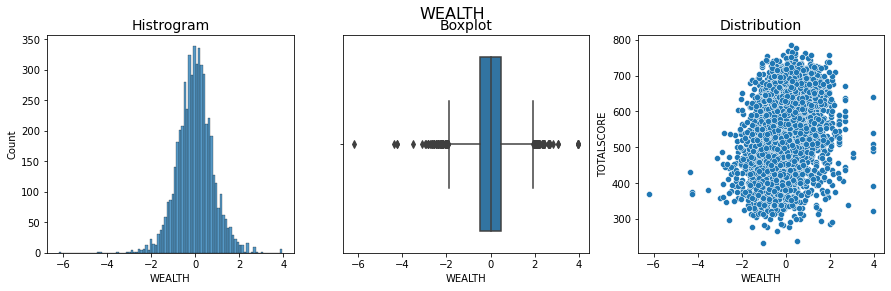

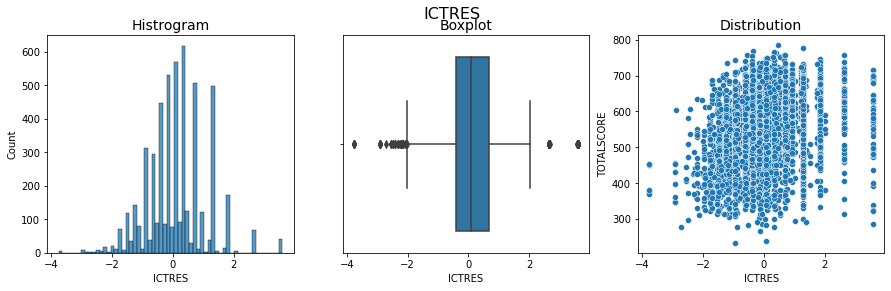

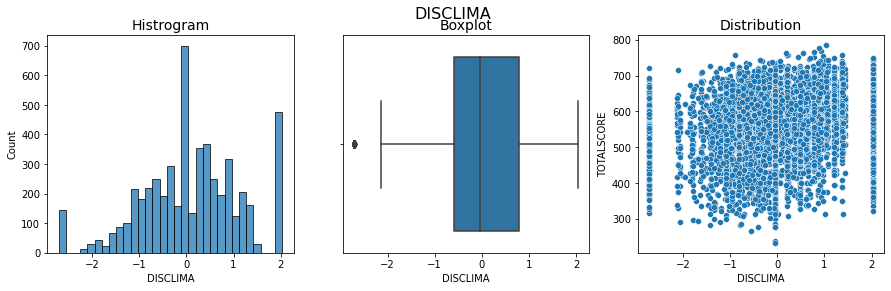

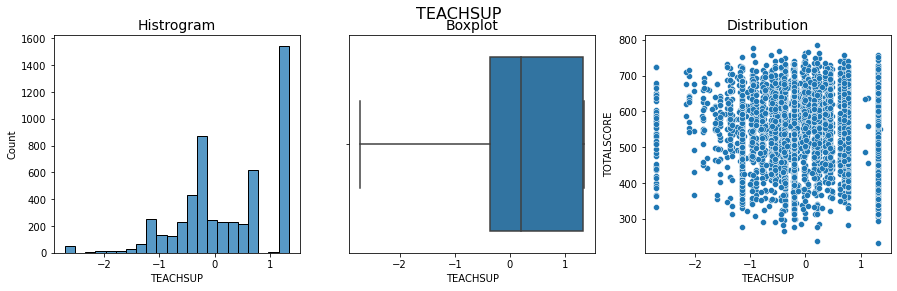

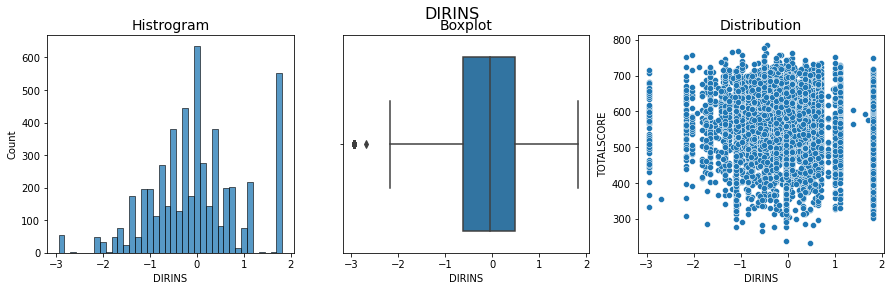

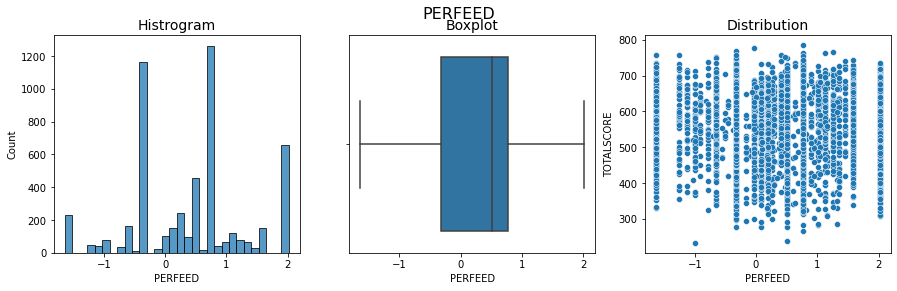

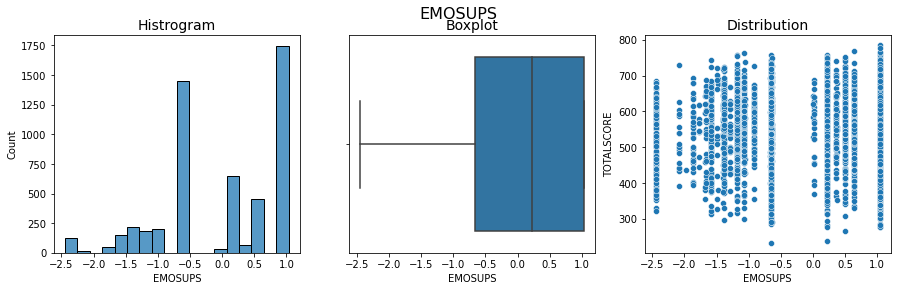

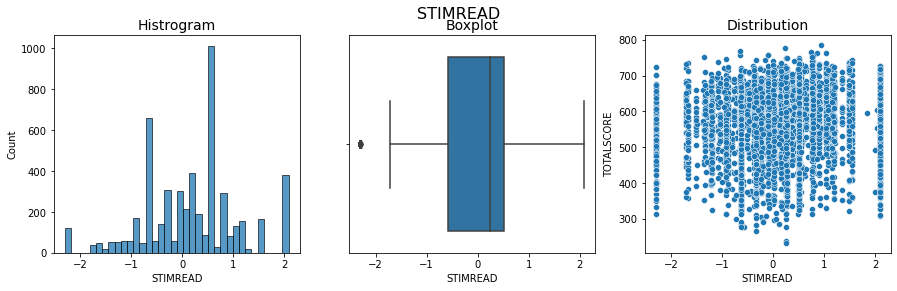

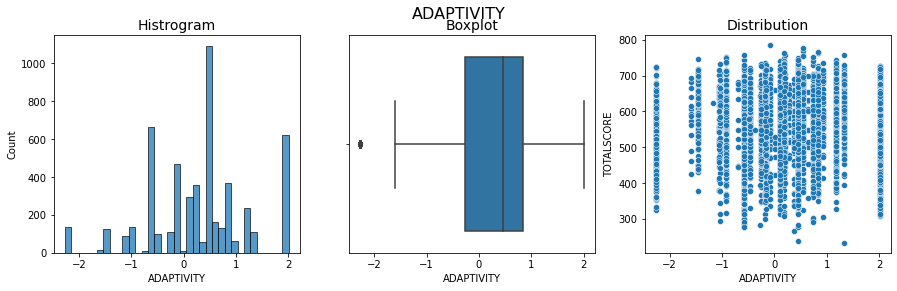

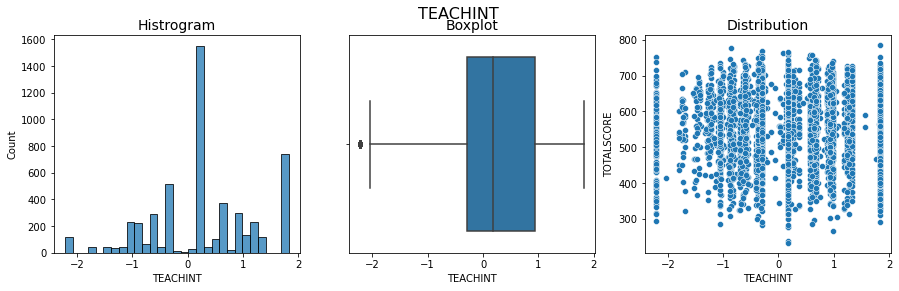

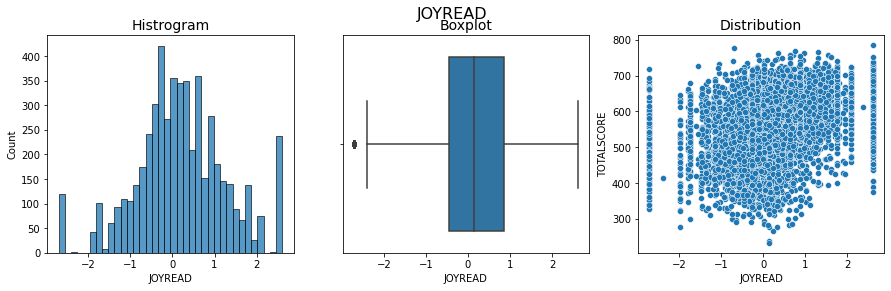

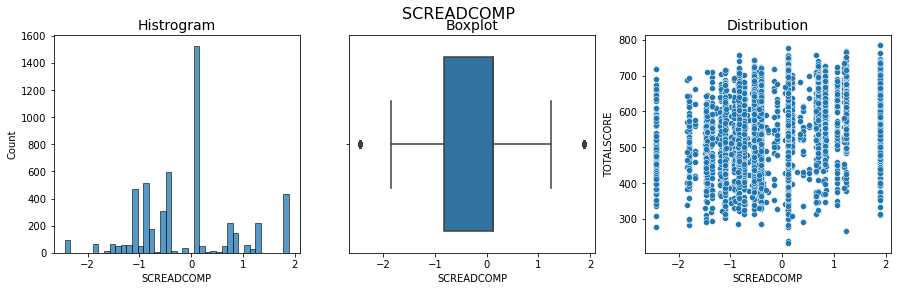

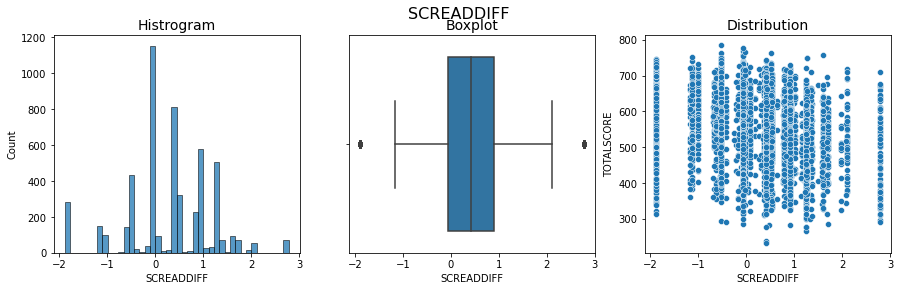

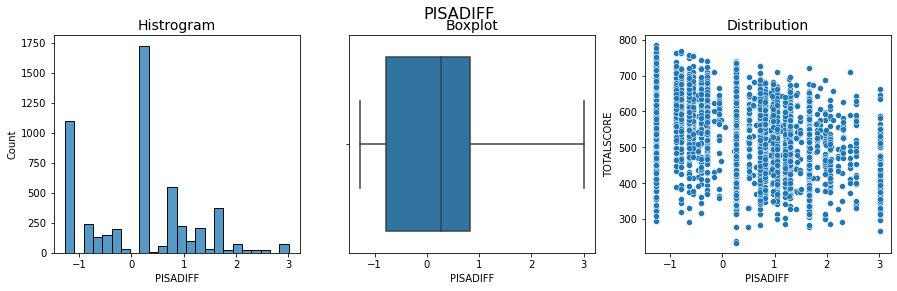

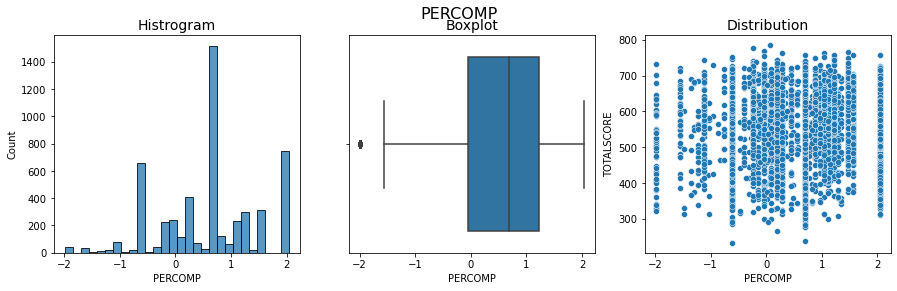

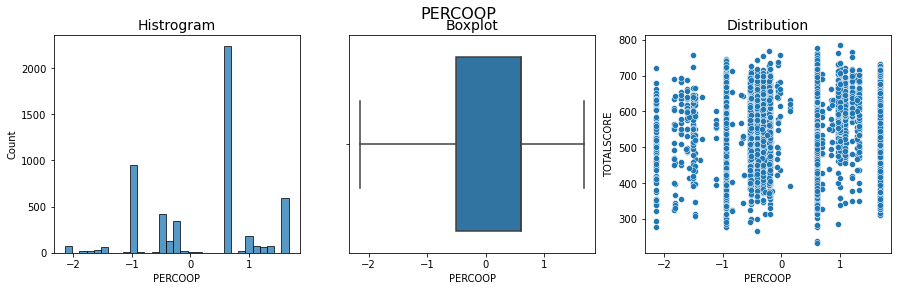

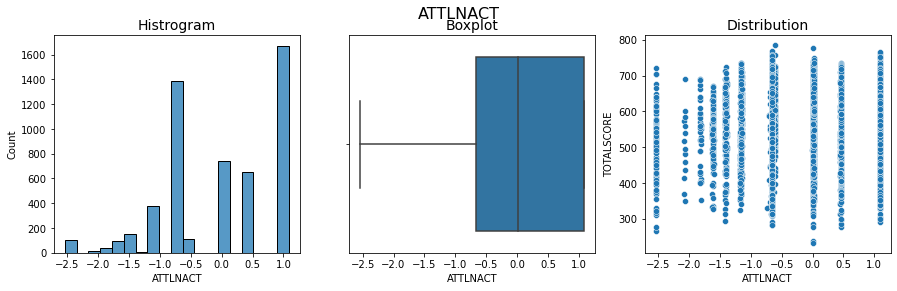

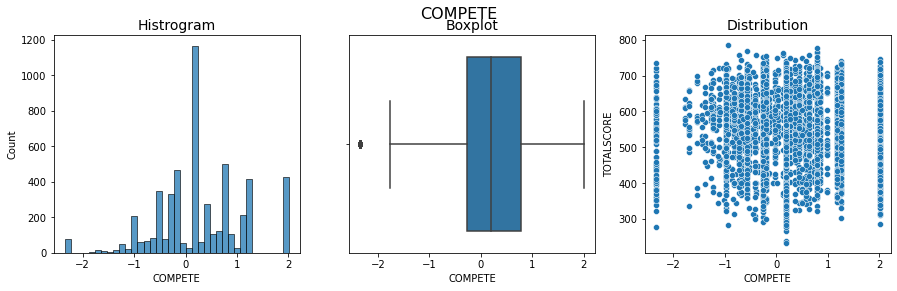

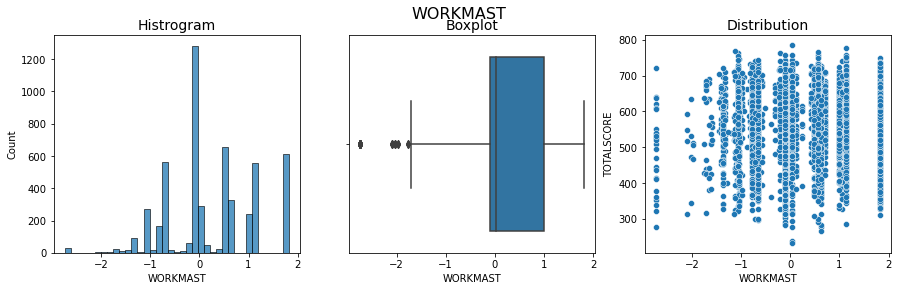

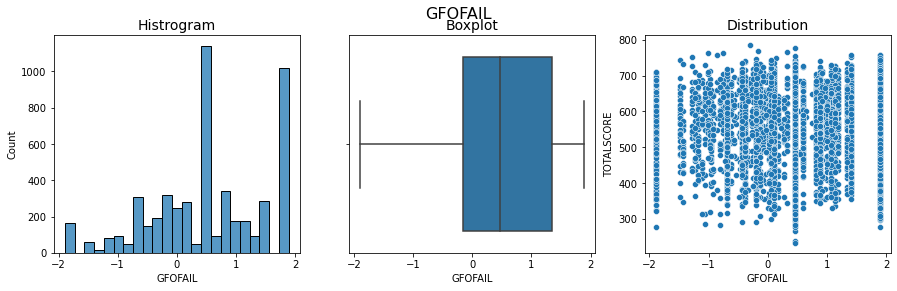

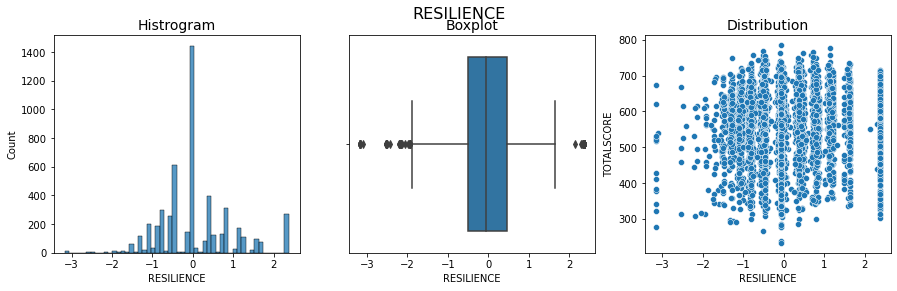

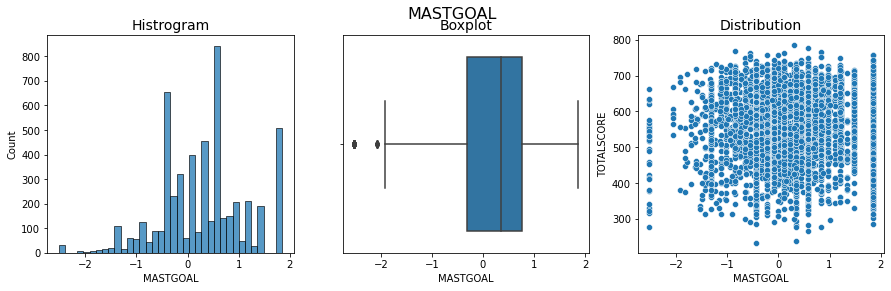

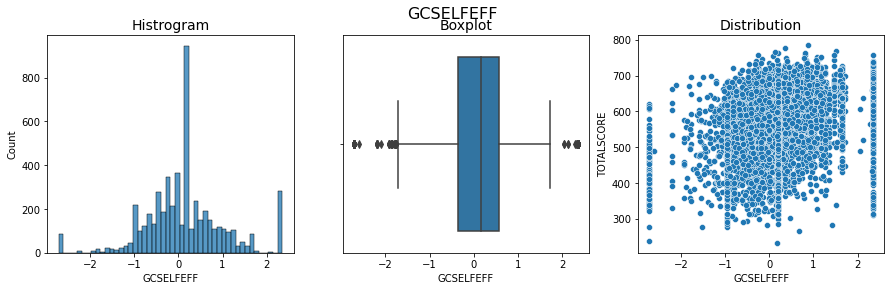

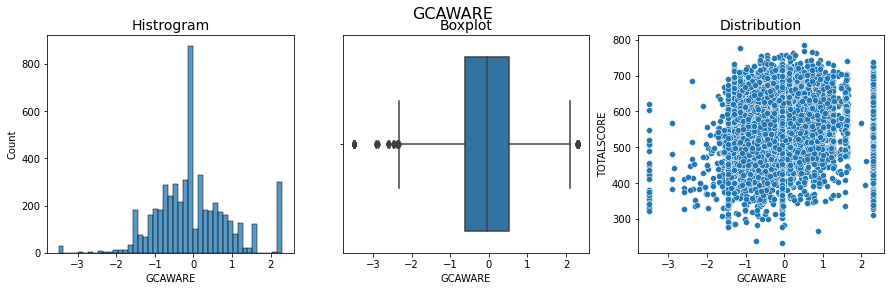

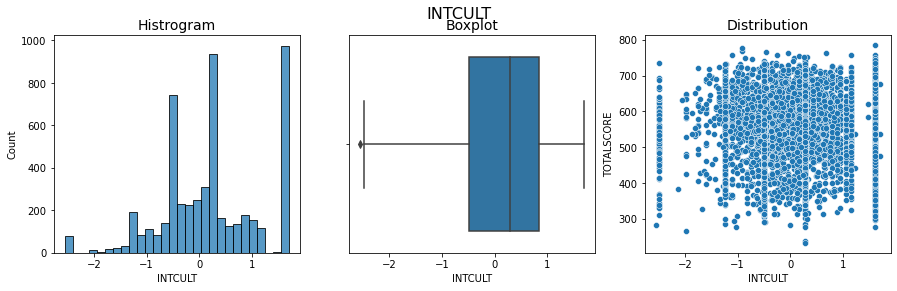

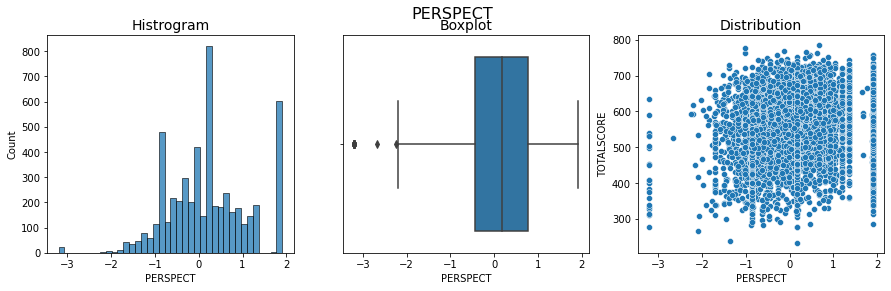

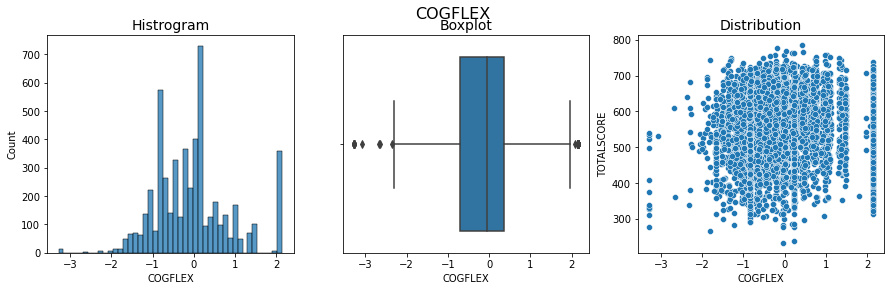

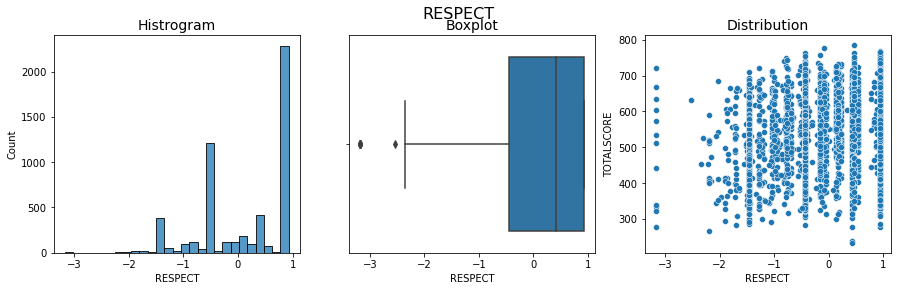

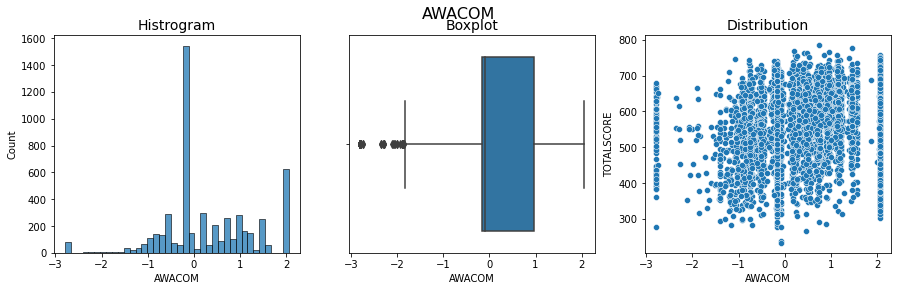

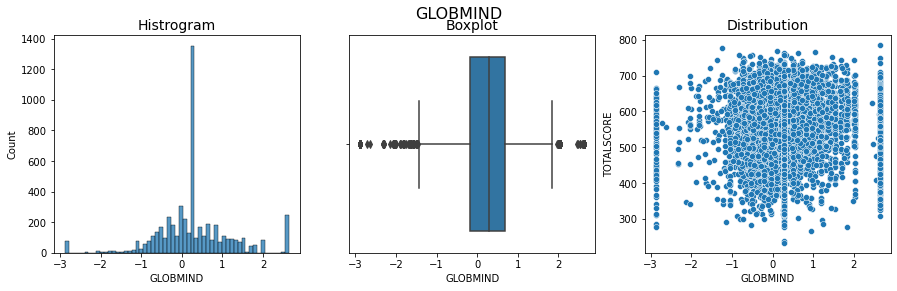

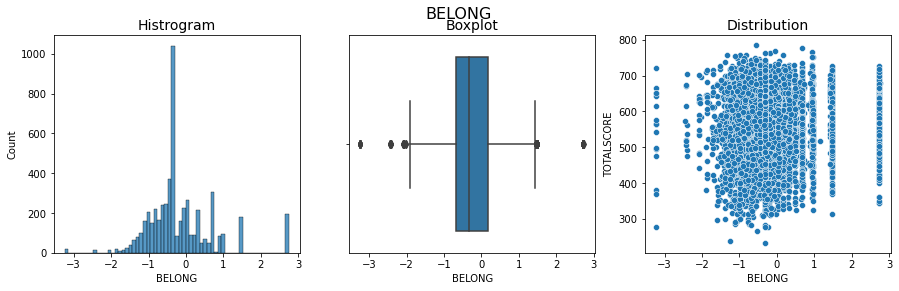

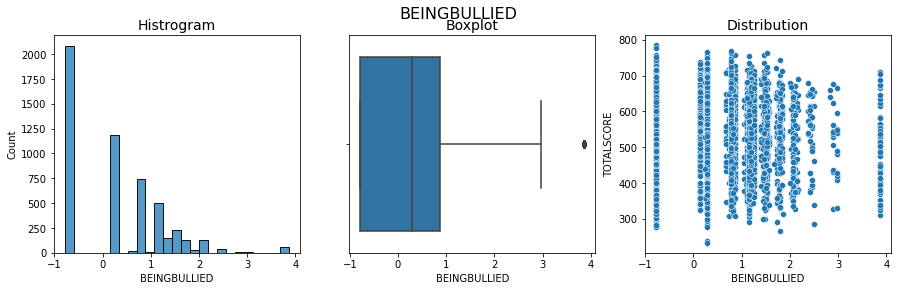

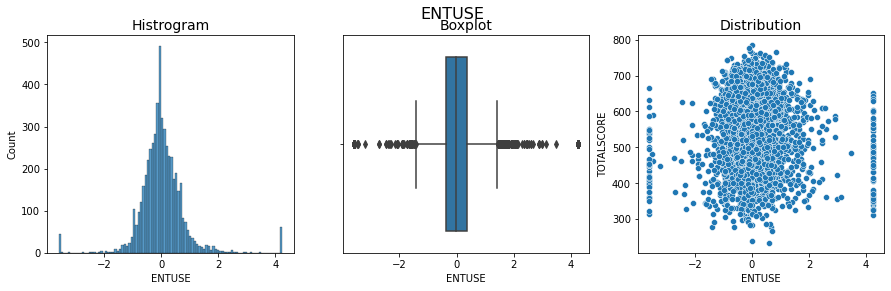

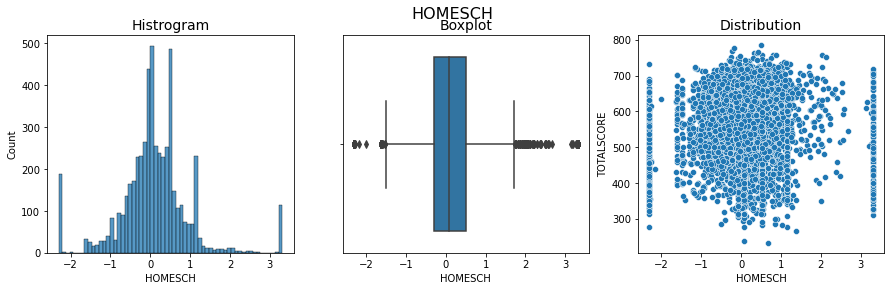

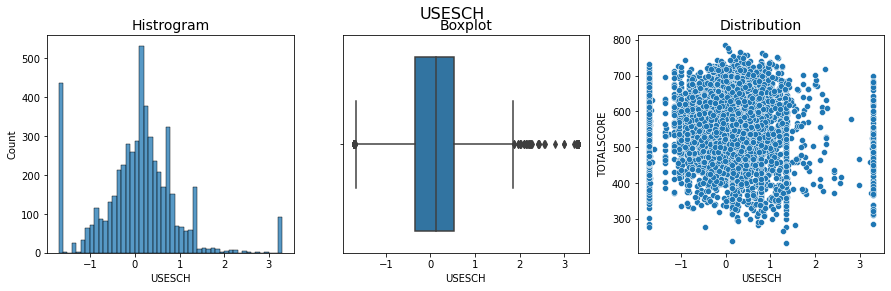

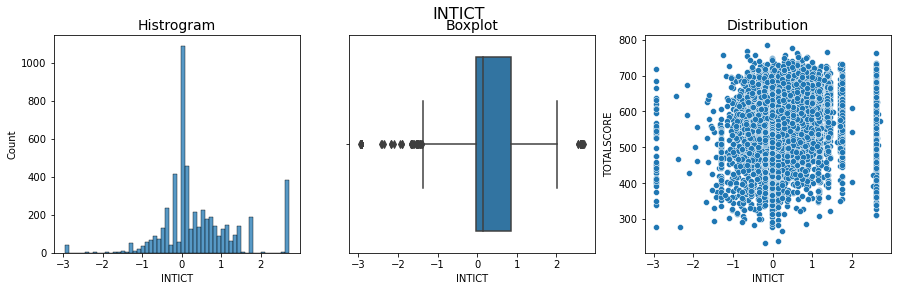

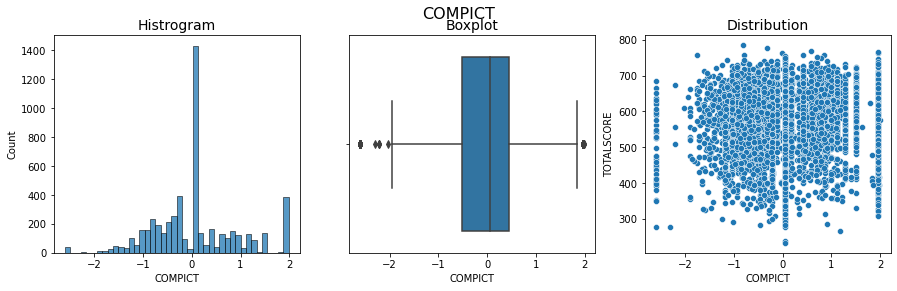

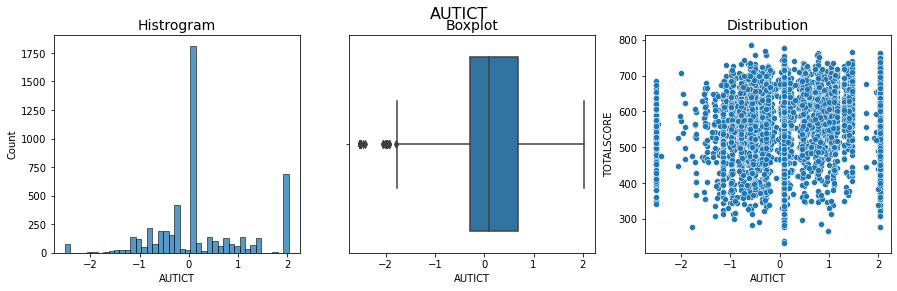

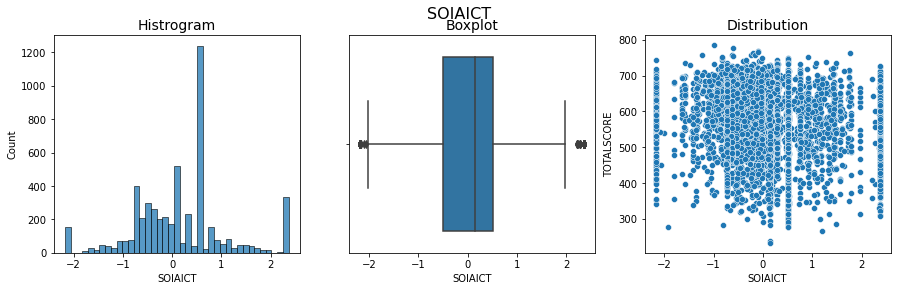

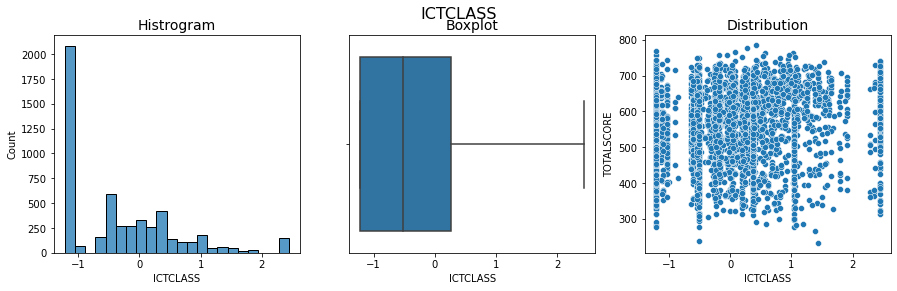

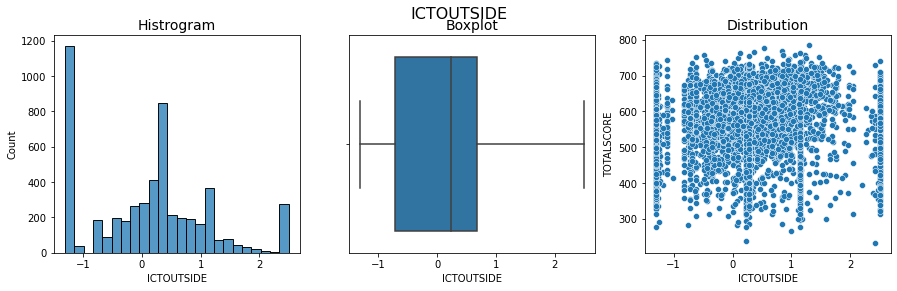

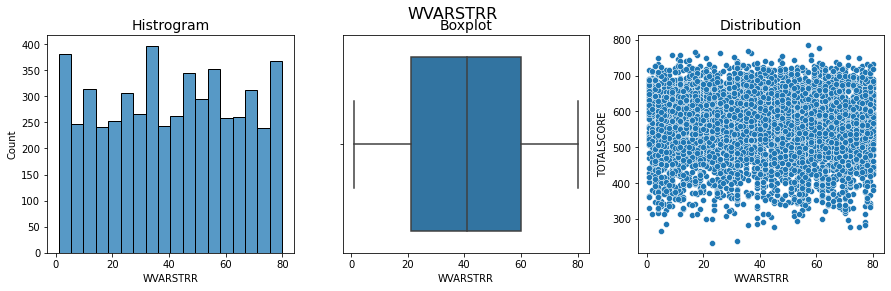

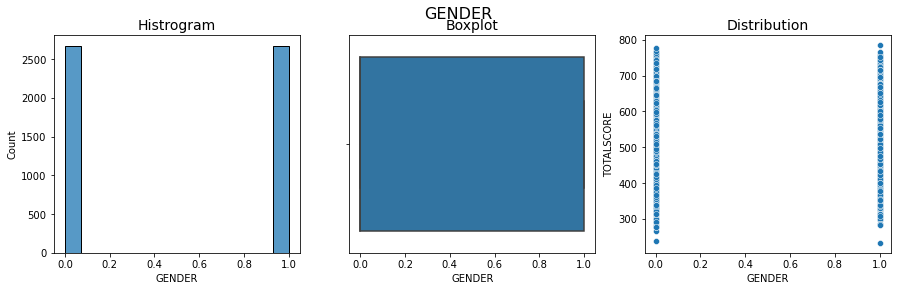

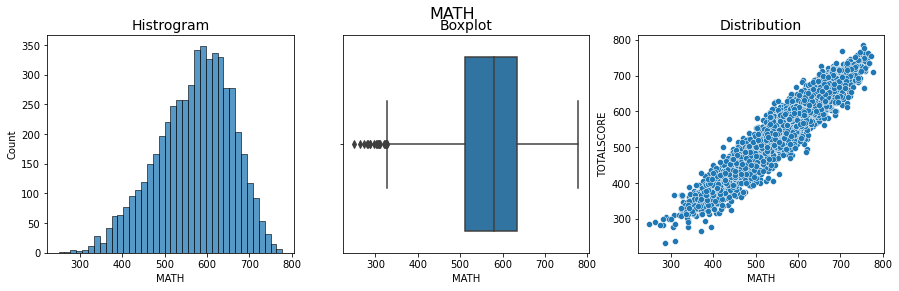

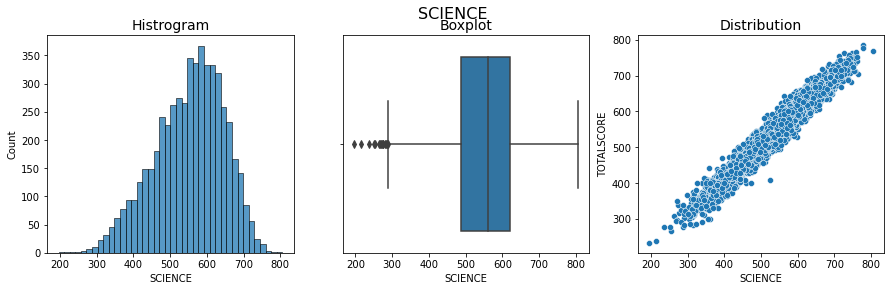

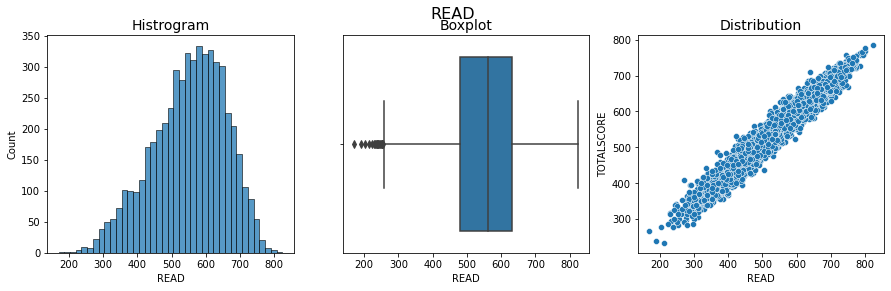

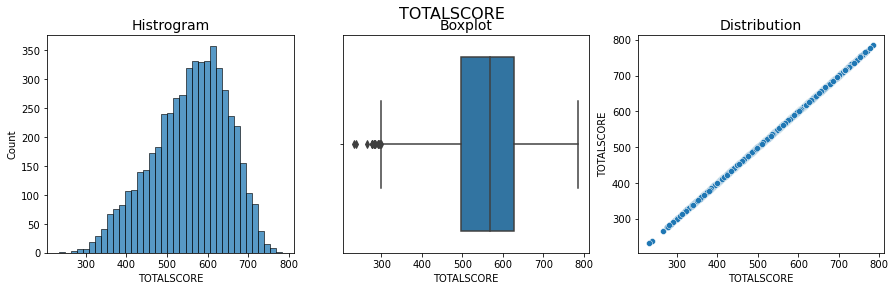

In [20]:
numvar = train_singapore.dtypes !="object"
numeric_features = list(numvar[numvar].index)
for col in numeric_features:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    ax = ax.ravel() 
    fig.suptitle(f"{col}\n", fontsize=16)
    ax[0].set_title(f'Histrogram', fontsize =14)
    sns.histplot(train_singapore[col], ax=ax[0])
    ax[1].set_title(f'Boxplot', fontsize =14)
    sns.boxplot(x=train_singapore[col], ax=ax[1])
    ax[2].set_title(f'Distribution', fontsize =14)
    sns.scatterplot(x = train_singapore[col], y= train_singapore['TOTALSCORE'],ax=ax[2])
    plt.show()

In [21]:
#remove extreme outliers
train_singapore = train_singapore[(train_singapore['PARED'] >4)]
train_singapore = train_singapore[(train_singapore['PAREDINT'] >4)]
train_singapore = train_singapore[(train_singapore['MMINS'] < 2000)]
train_singapore = train_singapore[(train_singapore['LMINS'] < 2000)]
train_singapore = train_singapore[(train_singapore['SMINS'] < 2000)]
train_singapore = train_singapore[(train_singapore['ESCS'] >= -3)]
train_singapore = train_singapore[(train_singapore['ICTHOME'] > 0)]
train_singapore = train_singapore[(train_singapore['HOMEPOS'] > -5)]
train_singapore = train_singapore[(train_singapore['HOMEPOS'] < 4)]
train_singapore = train_singapore[(train_singapore['HEDRES'] > -4)]
train_singapore = train_singapore[(train_singapore['WEALTH'] > -4)]
train_singapore = train_singapore[(train_singapore['ICTRES'] > -4)]
train_singapore = train_singapore[(train_singapore['WORKMAST'] > -3)]

In [22]:
#remove extreme outliers
test_singapore = test_singapore[(test_singapore['PARED'] >4)]
test_singapore = test_singapore[(test_singapore['PAREDINT'] >4)]
test_singapore = test_singapore[(test_singapore['MMINS'] < 2000)]
test_singapore = test_singapore[(test_singapore['LMINS'] < 2000)]
test_singapore = test_singapore[(test_singapore['SMINS'] < 2000)]
test_singapore = test_singapore[(test_singapore['ESCS'] >= -3)]
test_singapore = test_singapore[(test_singapore['ICTHOME'] > 0)]
test_singapore = test_singapore[(test_singapore['HOMEPOS'] > -5)]
test_singapore = test_singapore[(test_singapore['HOMEPOS'] < 4)]
test_singapore = test_singapore[(test_singapore['HEDRES'] > -4)]
test_singapore = test_singapore[(test_singapore['WEALTH'] > -4)]
test_singapore = test_singapore[(test_singapore['ICTRES'] > -4)]
test_singapore = test_singapore[(test_singapore['WORKMAST'] > -3)]

In [23]:
train_singapore.shape, test_singapore.shape

((5274, 75), (1317, 75))

In [24]:
# Creating a function to plot boxplot

def subplot_boxplot(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    
    ax = ax.ravel() 
    
    if len(list_of_columns) %2 !=0:
        
        ax[len(list_of_columns)].set_visible(False)
        
    for i, column in enumerate(list_of_columns):
        
        names = train_singapore.groupby(column).mean()['TOTALSCORE'].sort_values().index
        
        sns.boxplot(x = dataframe[column],y = dataframe['TOTALSCORE'],order = names, ax = ax[i], color="#99d6ff") 
        
        ax[i].set_title(f'TOTALSCORE  vs {column}', fontsize =16)
        
        ax[i].set_ylabel('Values',fontsize=15)
        
        ax[i].set_xlabel(column,fontsize=15) 
        
        ax[i].set_xticklabels(names,rotation=40) 
        
    plt.tight_layout()

In [25]:
train_singapore['GENDER'] = train_singapore['GENDER'].astype('object')

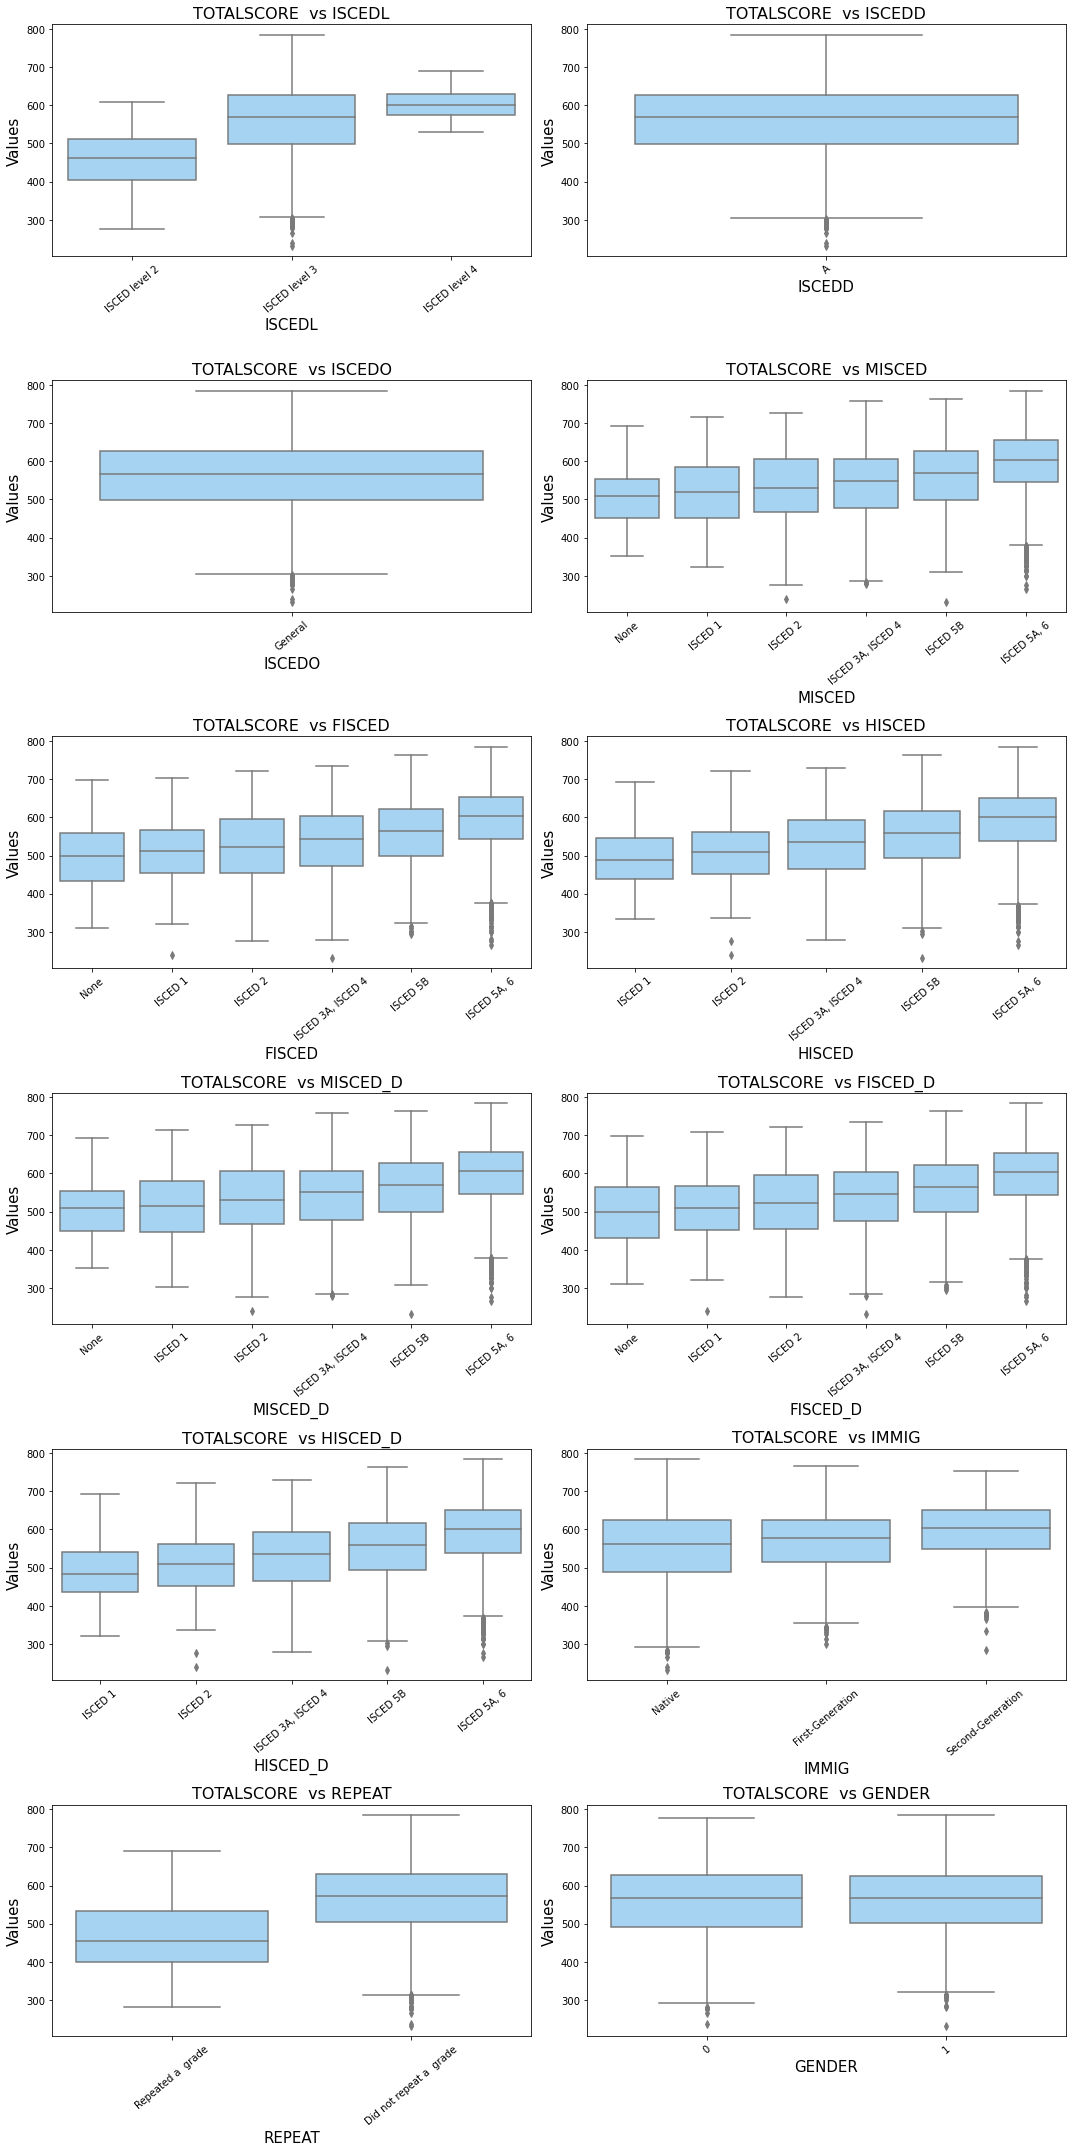

In [26]:
obvar = train_singapore.dtypes =="object"
categorical_features = list(obvar[obvar].index) 
subplot_boxplot(train_singapore, categorical_features)

In [27]:
train_singapore.drop(columns=['MISCED_D', 'FISCED_D', 'HISCED_D', 'ISCEDD', 'PARED'], axis =1, inplace = True)
test_singapore.drop(columns=['MISCED_D', 'FISCED_D', 'HISCED_D', 'ISCEDD', 'PARED'], axis =1, inplace = True)

In [28]:
# grouping values of categorical columns to reduce number of categories. 
train_singapore['Is_MISCED_5A,6'] = np.where(train_singapore['MISCED'] == 'ISCED 5A, 6', 1, 0)
train_singapore['Is_FISCED_5A,6'] = np.where(train_singapore['FISCED'] == 'ISCED 5A, 6', 1, 0)
train_singapore['Is_HISCED_5A,6'] = np.where(train_singapore['HISCED'] == 'ISCED 5A, 6', 1, 0)

In [29]:
# grouping values of categorical columns to reduce number of categories. 
test_singapore['Is_MISCED_5A,6'] = np.where(test_singapore['MISCED'] == 'ISCED 5A, 6', 1, 0)
test_singapore['Is_FISCED_5A,6'] = np.where(test_singapore['FISCED'] == 'ISCED 5A, 6', 1, 0)
test_singapore['Is_HISCED_5A,6'] = np.where(test_singapore['HISCED'] == 'ISCED 5A, 6', 1, 0)

In [30]:
#drop original columns
train_singapore.drop(columns= ['MISCED', 'FISCED', 'HISCED'], axis =1, inplace =True)
test_singapore.drop(columns= ['MISCED', 'FISCED', 'HISCED'], axis =1, inplace =True)

In [31]:
train_singapore_cormatrix = train_singapore.drop(columns= ['MATH','SCIENCE','READ','TOTALSCORE',], axis =1)

<AxesSubplot:>

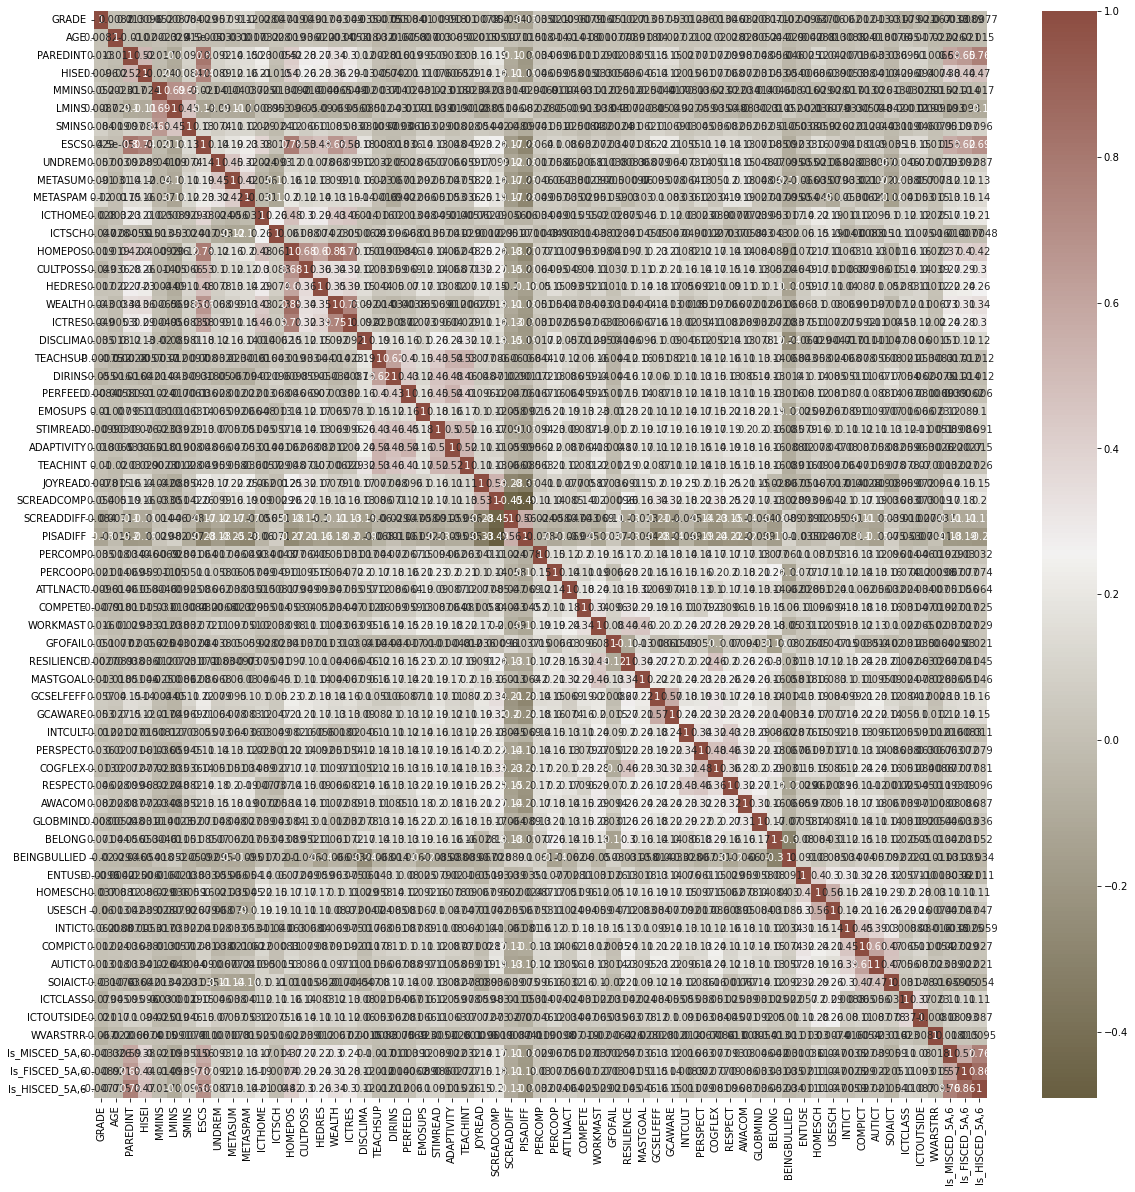

In [32]:
#Checking collinearity using correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= train_singapore_cormatrix.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [33]:
# Drop columns with high correlation 
#Create correlation matrix
corr_matrix = train_singapore_cormatrix.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(to_drop)

['WEALTH', 'Is_HISCED_5A,6']


In [34]:
# Drop features 
train_singapore.drop(to_drop, axis=1, inplace=True)
test_singapore.drop(to_drop, axis=1, inplace=True)
train_singapore.shape, test_singapore.shape

((5274, 68), (1317, 68))

In [35]:
#Exploring target variables

In [36]:
train_singapore[['MATH','READ', 'SCIENCE','TOTALSCORE']].describe().round(2)

MATH     READ  SCIENCE  TOTALSCORE
count  5274.00  5274.00  5274.00     5274.00
mean    570.35   551.57   552.55      558.16
std      87.80   106.17    93.09       92.70
min     249.16   169.94   196.01      232.33
25%     512.68   482.53   489.34      497.63
50%     580.46   561.70   562.84      568.10
75%     634.79   630.79   621.92      627.36
max     777.50   823.40   805.27      784.57

<Figure size 432x432 with 0 Axes>

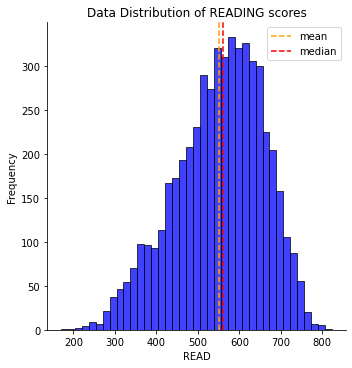

In [37]:
#checking Data Distribution of READING scores
plt.figure(figsize=(6,6))

sns.displot(train_singapore['READ'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of READING scores')

plt.axvline(train_singapore['READ'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_singapore['READ'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();


<Figure size 432x432 with 0 Axes>

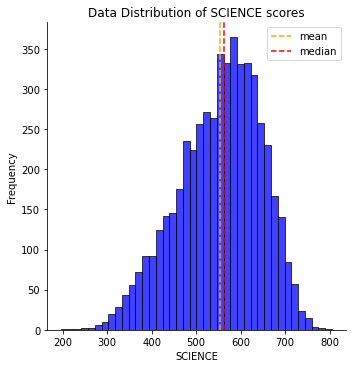

In [38]:
#checking Data Distribution of SCIENCE scores
plt.figure(figsize=(6,6))

sns.displot(train_singapore['SCIENCE'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of SCIENCE scores')

plt.axvline(train_singapore['SCIENCE'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_singapore['SCIENCE'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

<Figure size 432x432 with 0 Axes>

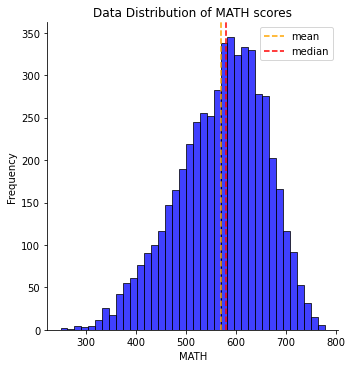

In [39]:
#checking Data Distribution of MATH scores
plt.figure(figsize=(6,6))

sns.displot(train_singapore['MATH'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of MATH scores')

plt.axvline(train_singapore['MATH'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_singapore['MATH'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

<Figure size 432x432 with 0 Axes>

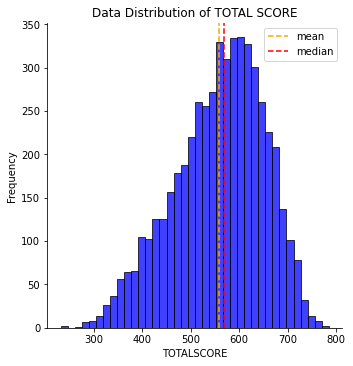

In [40]:
#checking Data Distribution of TOTAL scores
plt.figure(figsize=(6,6))

sns.displot(train_singapore['TOTALSCORE'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of TOTAL SCORE')

plt.axvline(train_singapore['TOTALSCORE'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_singapore['TOTALSCORE'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

In [41]:
#Exploring features with high correlation wiht target variable

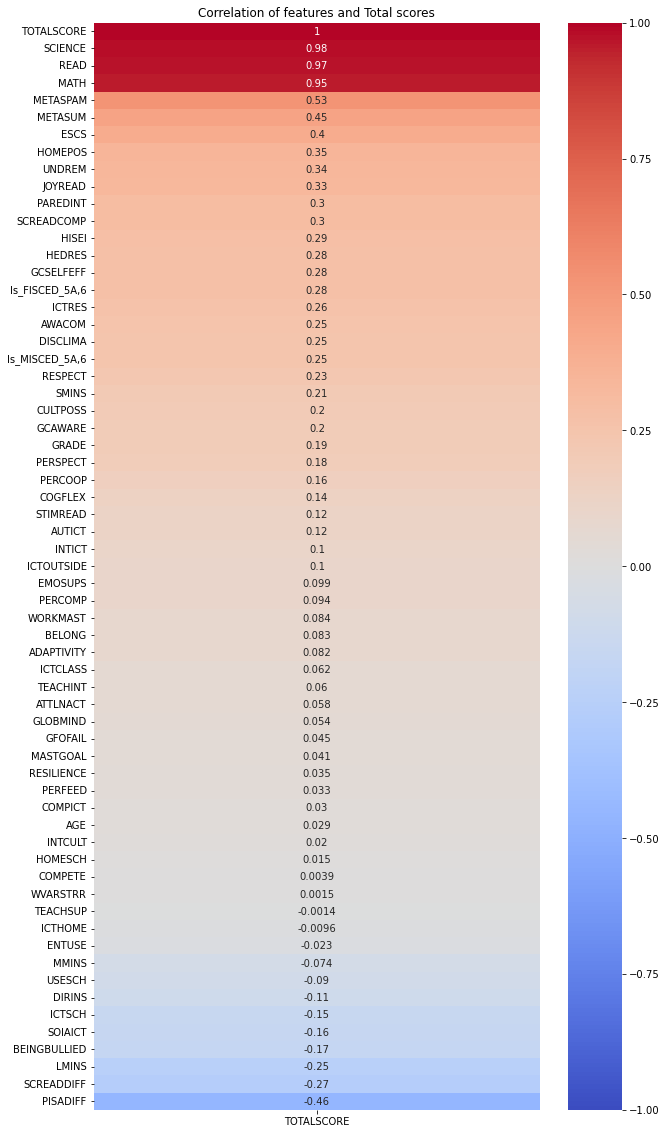

In [42]:
plt.figure(figsize = (10,20))
sns.heatmap(train_singapore.corr()[['TOTALSCORE']].sort_values(by = 'TOTALSCORE', ascending = False), 
                cmap = 'coolwarm',
                vmax = 1,
                vmin = -1,
                annot = True)
plt.title('Correlation of features and Total scores')

plt.yticks(rotation =0)
plt.show()

In [43]:
selectd_features = (train_singapore.corr()[['TOTALSCORE']] > 0.20) | (train_singapore.corr()[['TOTALSCORE']] <= -0.20)
selectd_features[selectd_features['TOTALSCORE']==True].index.values

array(['PAREDINT', 'HISEI', 'LMINS', 'SMINS', 'ESCS', 'UNDREM', 'METASUM',
       'METASPAM', 'HOMEPOS', 'HEDRES', 'ICTRES', 'DISCLIMA', 'JOYREAD',
       'SCREADCOMP', 'SCREADDIFF', 'PISADIFF', 'GCSELFEFF', 'RESPECT',
       'AWACOM', 'MATH', 'SCIENCE', 'READ', 'TOTALSCORE',
       'Is_MISCED_5A,6', 'Is_FISCED_5A,6'], dtype=object)

In [44]:
train_singapore.to_csv('train_pisa2018_singapore.csv')
test_singapore.to_csv('test_pisa2018_singapore.csv')

In [45]:
obvar = train_singapore.dtypes =="object"
categorical_features = list(obvar[obvar].index) 
categorical_features

['ISCEDL', 'ISCEDO', 'IMMIG', 'REPEAT', 'GENDER']

In [47]:
#Assemble our X and y variables
X_train =train_singapore[['PAREDINT', 'HISEI', 'ESCS', 'UNDREM', 'METASUM', 'METASPAM',
       'HOMEPOS', 'HEDRES', 'ICTRES', 'JOYREAD', 'SCREADCOMP',
       'SCREADDIFF', 'PISADIFF', 'GCSELFEFF', 'AWACOM', 'Is_FISCED_5A,6', 'ISCEDL', 'ISCEDO', 'IMMIG', 'REPEAT', 'GENDER']]
X_train = pd.get_dummies(columns=['Is_FISCED_5A,6', 'ISCEDL', 'ISCEDO', 'IMMIG', 'REPEAT', 'GENDER'], 
                         drop_first =True, data =X_train)
y_train = train_singapore['TOTALSCORE']

X_test =test_singapore[['PAREDINT', 'HISEI', 'ESCS', 'UNDREM', 'METASUM', 'METASPAM',
       'HOMEPOS', 'HEDRES', 'ICTRES', 'JOYREAD', 'SCREADCOMP',
       'SCREADDIFF', 'PISADIFF', 'GCSELFEFF', 'AWACOM', 'Is_FISCED_5A,6', 'ISCEDL', 'ISCEDO', 'IMMIG', 'REPEAT', 'GENDER']]
X_test = pd.get_dummies(columns=['Is_FISCED_5A,6', 'ISCEDL', 'ISCEDO', 'IMMIG', 'REPEAT', 'GENDER'], 
                         drop_first =True, data =X_test)
y_test = test_singapore['TOTALSCORE']

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


In [48]:
from sklearn.dummy import DummyRegressor
baseline_model = DummyRegressor()
baseline_model.fit(X_train, y_train)
baseline_preds = baseline_model.predict(X_test)
# Test Score
baseline_model.score(X_test, y_test)
print(f'Test R-squared Score: {baseline_model.score(X_test, y_test)}')
#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test, baseline_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, baseline_preds, squared = False)}' )

Test R-squared Score: -0.004759652675634163
MSE is : 8555.551237008993
RMSE is : 92.49622282563215


In [49]:
#scaler = StandardScaler()  #scaler object
#X_train_sc = scaler.fit_transform(X_train)  #scaling training set
#X_test_sc = scaler.transform(X_test)  #scaling test set


lr = LinearRegression()
lr.fit(X_train, y_train)

# Train Score
lr.score(X_train, y_train)
print(f'Train R-squared Score: {lr.score(X_train, y_train)}')
print()

# Test Score
lr.score(X_test, y_test)
print(f'Test R-squared Score: {lr.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(lr, X_train, y_train, cv =5)
print(f' Cross Val Score :{cross_val_score(lr, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = lr.predict(X_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

Train R-squared Score: 0.5161161216838297

Test R-squared Score: 0.4891921211955743
 Cross Val Score :[0.49589579 0.53040481 0.52011315 0.50405567 0.50383596]

MSE is : 4349.540676460649
RMSE is : 65.95104757667347


In [50]:
lr.intercept_

530.8706343963568

In [51]:
pd.Series(lr.coef_, index = X_train.columns).sort_values(ascending=False)

METASPAM                    26.010580
ISCEDL_ISCED level 3        25.971408
ESCS                        16.430073
METASUM                     15.170082
IMMIG_Second-Generation     14.144782
GCSELFEFF                    9.694387
JOYREAD                      9.064614
UNDREM                       8.468804
Is_FISCED_5A,6_1             7.665252
HEDRES                       7.095727
AWACOM                       4.437450
ICTRES                       2.932375
SCREADDIFF                   1.111278
HISEI                        0.072349
PAREDINT                    -0.669251
IMMIG_Native                -1.197514
SCREADCOMP                  -4.267271
HOMEPOS                     -4.837417
ISCEDL_ISCED level 4        -7.315409
GENDER_1                   -13.511276
PISADIFF                   -18.322992
REPEAT_Repeated a  grade   -47.646454
dtype: float64

In [52]:
scaler = StandardScaler()  #scaler object
X_train_sc = scaler.fit_transform(X_train)  #scaling training set
X_test_sc = scaler.transform(X_test)  #scaling test set

lr = LinearRegression()
lr.fit(X_train_sc, y_train)
y_preds = lr.predict(X_test_sc)

In [53]:
# coefficient dataframe
lr_coef = pd.DataFrame(data=[lr.coef_],columns=X_train.columns).T.sort_values(by=0,ascending=False)

# Label the color the each coefficient
color = ['red' if x < 0 else 'blue' for x in lr_coef[0]]

# Assign the color_list to new column
lr_coef['color'] = color

lr_coef.head()

0 color
METASPAM   26.330739  blue
METASUM    15.356832  blue
ESCS       14.511486  blue
JOYREAD     9.722963  blue
GCSELFEFF   8.778647  blue

In [54]:
# Select the highest values whether negative or positive
abs(lr_coef[0]).sort_values(ascending=False)[:10].index

Index(['METASPAM', 'PISADIFF', 'METASUM', 'ESCS', 'REPEAT_Repeated a  grade',
       'JOYREAD', 'GCSELFEFF', 'UNDREM', 'HEDRES', 'GENDER_1'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 highest coefficient')

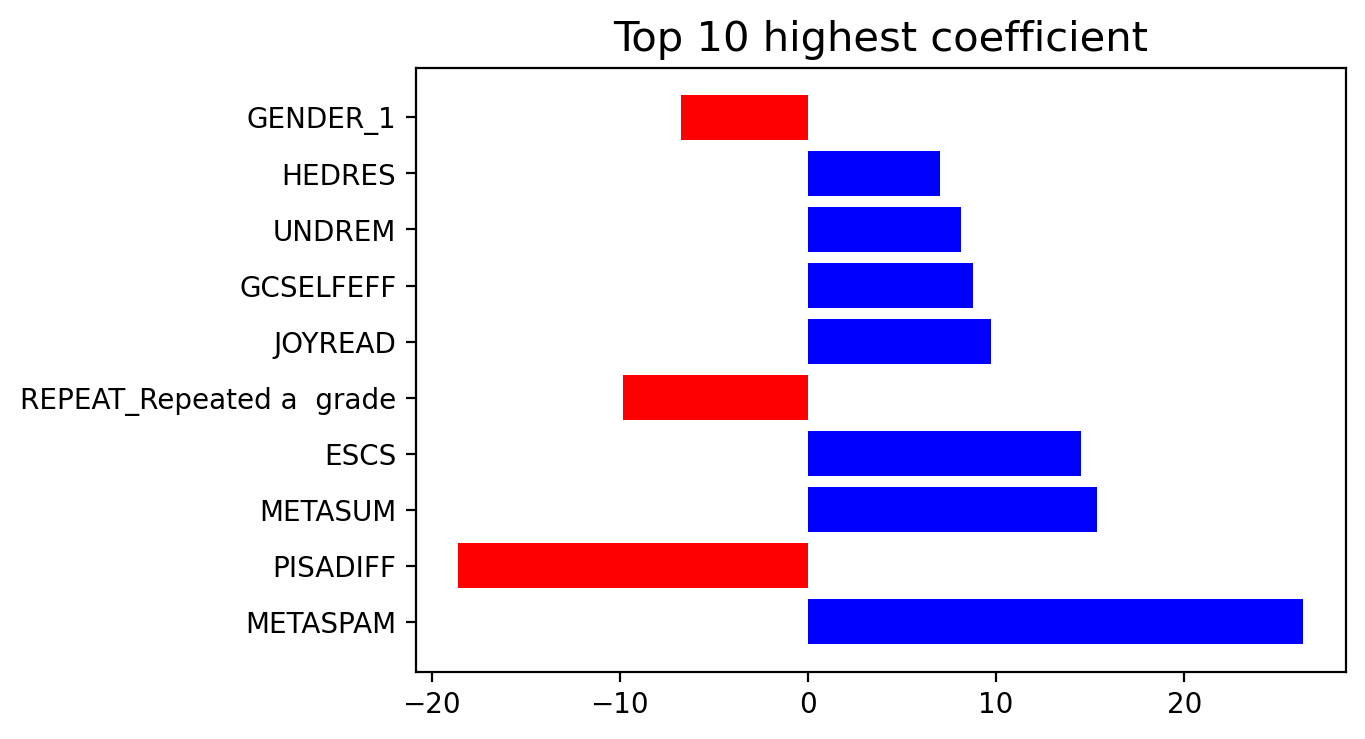

In [56]:
# Plot the coefficient of top 10 highest coefficient 
plt.figure(dpi=200)
plt.barh(lr_coef.loc[['METASPAM', 'PISADIFF', 'METASUM', 'ESCS', 'REPEAT_Repeated a  grade',
       'JOYREAD', 'GCSELFEFF', 'UNDREM', 'HEDRES', 'GENDER_1']].
         index,lr_coef.loc[['METASPAM', 'PISADIFF', 'METASUM', 'ESCS', 'REPEAT_Repeated a  grade',
       'JOYREAD', 'GCSELFEFF', 'UNDREM', 'HEDRES', 'GENDER_1']][0],
         color=lr_coef.loc[['METASPAM', 'PISADIFF', 'METASUM', 'ESCS', 'REPEAT_Repeated a  grade',
       'JOYREAD', 'GCSELFEFF', 'UNDREM', 'HEDRES', 'GENDER_1']]['color'])
plt.title('Top 10 highest coefficient',size=15)

In [57]:
#RandomForestRegressor
RFReg = RandomForestRegressor(max_depth = 4, random_state = 0).fit(X_train, y_train)
# Train Score
RFReg.score(X_train, y_train)
print(f'RFReg Train R-squared Score: {RFReg.score(X_train, y_train)}')
print()

# Test Score
RFReg.score(X_test, y_test)
print(f'RFReg Test R-squared Score: {RFReg.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(RFReg, X_train, y_train, cv =5)
print(f'RFReg Cross Val Score :{cross_val_score(RFReg, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = RFReg.predict(X_test)

#evaluate models with matrics
print(f'RFReg MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RFReg RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

RFReg Train R-squared Score: 0.47791120992930936

RFReg Test R-squared Score: 0.42602542066319493
RFReg Cross Val Score :[0.42521869 0.46603816 0.46989987 0.42070533 0.43391993]

RFReg MSE is : 4887.406564524966
RFReg RMSE is : 69.90998901820086


In [58]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [2,3,4],
}
regr = RandomForestRegressor(random_state=42)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [59]:
clf.best_params_

{'max_depth': 4, 'n_estimators': 200}

In [60]:
clf.score(X_train, y_train)

0.4774214292239708

In [61]:
# Making prediction
y_preds_clf = clf.predict(X_test)

#evaluate models with matrics
print(f'RFReg MSE is : {mean_squared_error(y_test, y_preds_clf)}' )
print(f'RFReg RMSE is : {mean_squared_error(y_test, y_preds_clf, squared = False)}' )

RFReg MSE is : 4897.318462407168
RFReg RMSE is : 69.98084353883688


In [62]:
clf.best_estimator_

RandomForestRegressor(max_depth=4, n_estimators=200, random_state=42)

In [63]:
pd.DataFrame(clf.cv_results_).sort_values('rank_test_score').head(5)[['params','param_max_depth','mean_test_score']]

params param_max_depth  mean_test_score
12  {'max_depth': 4, 'n_estimators': 200}               4         0.447276
13  {'max_depth': 4, 'n_estimators': 250}               4         0.446925
14  {'max_depth': 4, 'n_estimators': 300}               4         0.446910
11  {'max_depth': 4, 'n_estimators': 150}               4         0.446758
10  {'max_depth': 4, 'n_estimators': 100}               4         0.446691

In [64]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

#SVM
SVM = svm.SVR().fit(X_train_sc, y_train)
# Train Score
SVM.score(X_train_sc, y_train)
print(f'SVM Train R-squared Score: {SVM.score(X_train_sc, y_train)}')
print()

# Test Score
SVM.score(X_test_sc, y_test)
print(f'SVM Test R-squared Score: {SVM.score(X_test_sc, y_test)}')

# Cross Val Score
cross_val_score(SVM, X_train_sc, y_train, cv =5)
print(f'SVM Cross Val Score :{cross_val_score(SVM, X_train_sc, y_train, cv =5)}')
print()
# Making prediction
y_preds = SVM.predict(X_test_sc)

#evaluate SVMs with matrics
print(f'SVM MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'SVM RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

SVM Train R-squared Score: 0.4537474347898973

SVM Test R-squared Score: 0.42250795648800676
SVM Cross Val Score :[0.4083404  0.44605003 0.45970101 0.42798451 0.41680304]

SVM MSE is : 4917.3578517756305
SVM RMSE is : 70.12387504820046


In [65]:
#scaler = StandardScaler()

#X_train_sc = scaler.fit_transform(X_train)

#X_test_sc = scaler.transform(X_test)

#XGRegressor
XGReg = xg.XGBRegressor(objective ='reg:squarederror', max_depth = 3, seed = 1,verbosity=0).fit(X_train, y_train) 
# Train Score
XGReg.score(X_train, y_train)
print(f'XGReg Train R-squared Score: {XGReg.score(X_train, y_train)}')
print()

# Test Score
XGReg.score(X_test, y_test)
print(f'XGReg Test R-squared Score: {XGReg.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(XGReg, X_train, y_train, cv =5)
print(f'XGReg Cross Val Score :{cross_val_score(XGReg, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = XGReg.predict(X_test)

#evaluate models with matrics
print(f'XGReg MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'XGReg RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

XGReg Train R-squared Score: 0.6771160969151093

XGReg Test R-squared Score: 0.5026636527887688
XGReg Cross Val Score :[0.50850157 0.53539257 0.51853992 0.52187489 0.50842131]

XGReg MSE is : 4234.8302793227485
XGReg RMSE is : 65.0755735996445


In [66]:
#scaling 
#XGReg Train R-squared Score: 0.8062091261552633

#XGReg Test R-squared Score: 0.7036807027713595
#XGReg Cross Val Score :[0.71167068 0.73181853 0.70530674 0.72293502 0.73317806]

#XGReg MSE is : 2121.8446899941187
#XGReg RMSE is : 46.063485430372275

In [67]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [2,3,4,5],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[11:29:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[11:29:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.5341803078277894
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [68]:
pd.DataFrame(xgb_grid.cv_results_).sort_values('rank_test_score').head(5)[['params','param_max_depth','mean_test_score']]

params param_max_depth  \
4  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               2   
8  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               2   
1  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               3   
2  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               4   
0  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               2   

   mean_test_score  
4         0.534180  
8         0.534138  
1         0.533804  
2         0.533282  
0         0.531374

In [69]:
#XGRegressor
XGReg2 = xg.XGBRegressor(learning_rate = 0.03, max_depth = 4, min_child_weight = 4, n_estimators = 500, nthread = 4, \
                         objective = 'reg:linear', subsample = 0.7, seed = 1, verbosity=0).fit(X_train, y_train) 
# Train Score
XGReg2.score(X_train, y_train)
print(f'XGReg2 Train R-squared Score: {XGReg2.score(X_train, y_train)}')
print()

# Test Score
XGReg2.score(X_test, y_test)
print(f'XGReg2 Test R-squared Score: {XGReg2.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(XGReg2, X_train, y_train, cv =5)
print(f'XGReg2 Cross Val Score :{cross_val_score(XGReg2, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = XGReg2.predict(X_test)

#evaluate models with matrics
print(f'XGReg2 MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'XGReg2 RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}')

XGReg2 Train R-squared Score: 0.7006903569167156

XGReg2 Test R-squared Score: 0.5209307764339765
XGReg2 Cross Val Score :[0.52345676 0.56109455 0.54570987 0.53283624 0.53085743]

XGReg2 MSE is : 4079.285307066775
XGReg2 RMSE is : 63.86928296972477


 99%|===================| 5202/5274 [00:39<00:00]        

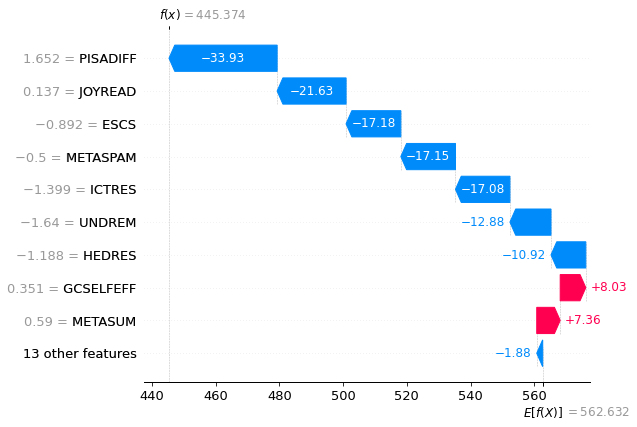

In [70]:
explainer = shap.Explainer(XGReg2, X_train)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[100])

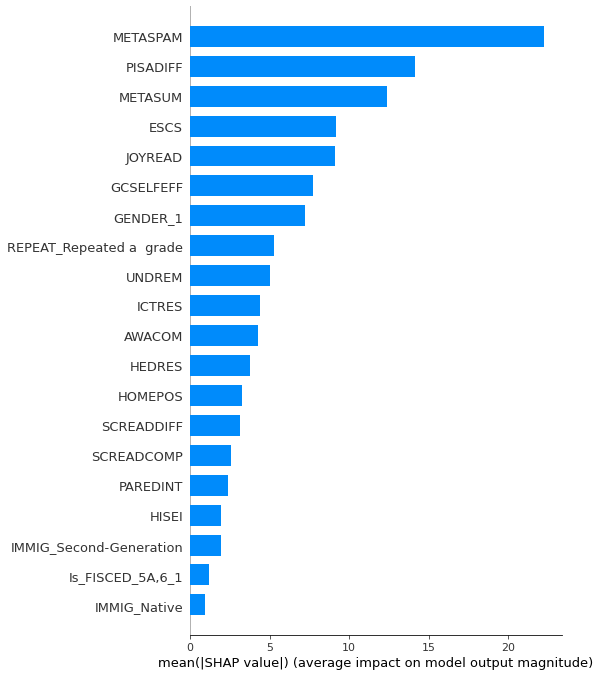

In [71]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

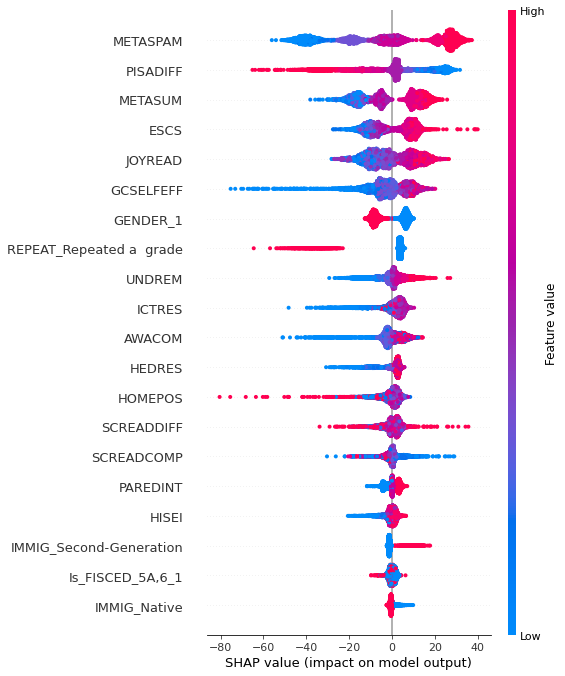

In [72]:
shap.summary_plot(shap_values, X_train)

C:\Users\science01\Anaconda3\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:1197: UserWarning:

Attempting to set identical bottom == top == 558.2005004882812 results in singular transformations; automatically expanding.

C:\Users\science01\Anaconda3\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:1448: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



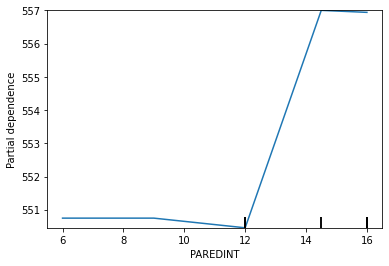

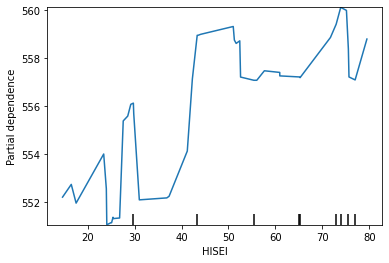

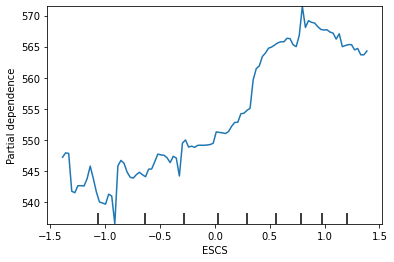

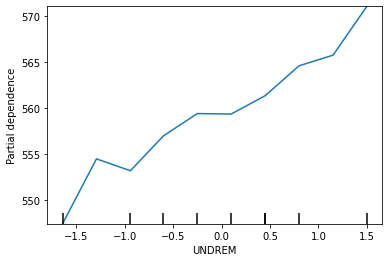

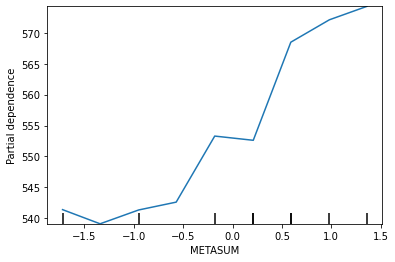

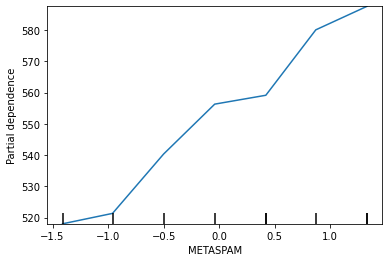

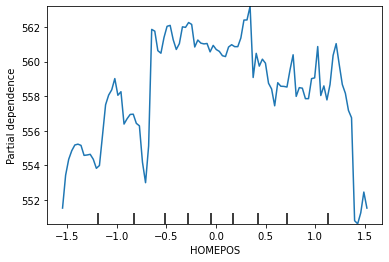

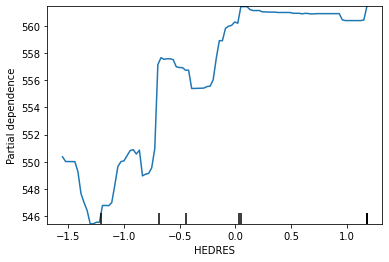

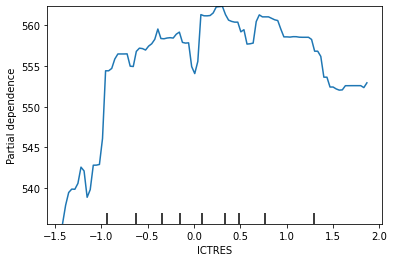

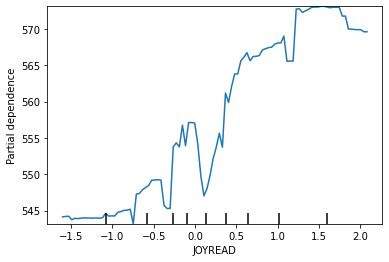

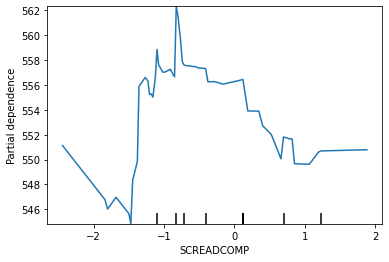

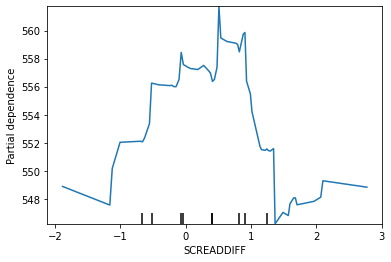

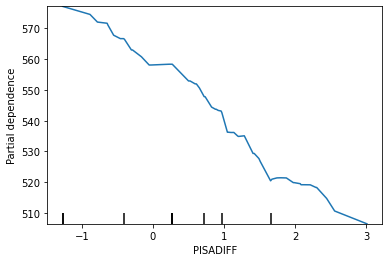

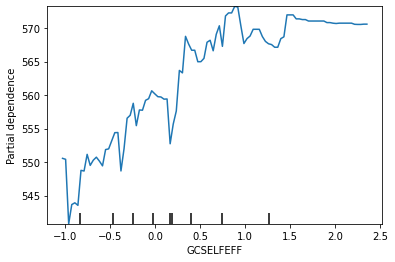

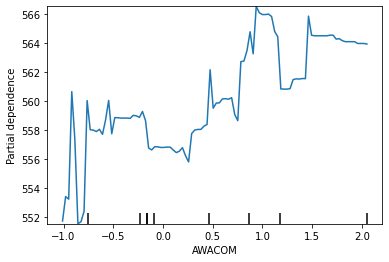

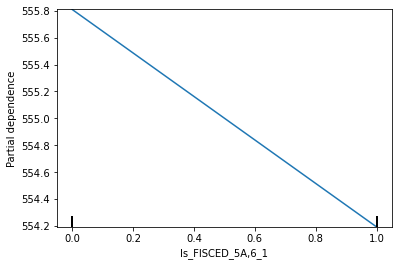

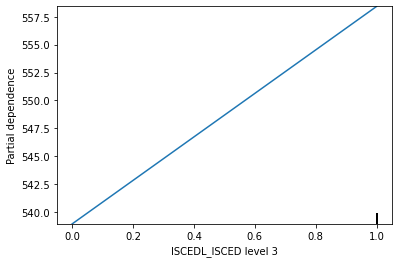

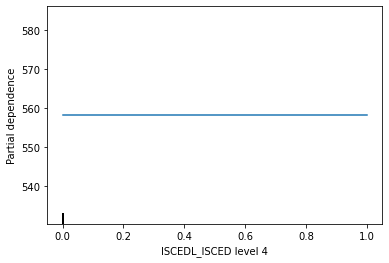

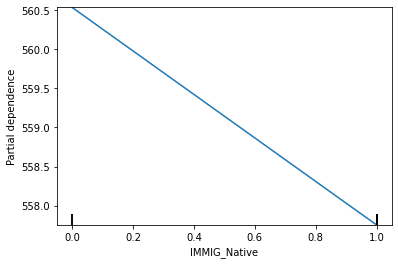

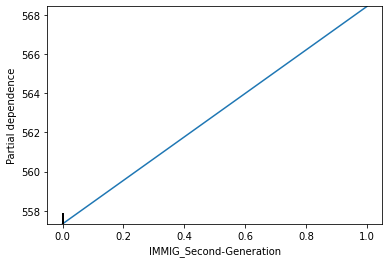

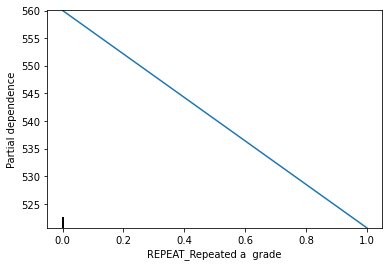

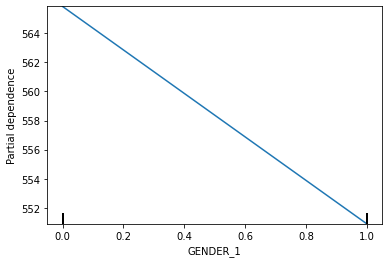

In [79]:
from sklearn.inspection import PartialDependenceDisplay
for cols_name in X_train.columns:
    PartialDependenceDisplay.from_estimator(XGReg2, X_train, [cols_name]);

In [73]:

#interpretml 
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression
from interpret.perf import RegressionPerf

In [74]:
lg = LinearRegression(random_state=42)
lg.fit(X_train, y_train)

lg_global = lg.explain_global()
show(lg_global)


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`


<!-- http://127.0.0.1:7527/1707019630624/ -->

In [75]:
lg_perf = RegressionPerf(lg.predict).explain_perf(X_test, y_test, name='LinearRegression')
show(lg_perf)

<!-- http://127.0.0.1:7527/1707032106800/ -->

In [76]:
ebm = ExplainableBoostingRegressor(random_state=42, n_jobs=-1, feature_names = X_train.columns)
ebm.fit(X_train, y_train) 

ExplainableBoostingRegressor(feature_names=['PAREDINT', 'HISEI', 'ESCS',
                                            'UNDREM', 'METASUM', 'METASPAM',
                                            'HOMEPOS', 'HEDRES', 'ICTRES',
                                            'JOYREAD', 'SCREADCOMP',
                                            'SCREADDIFF', 'PISADIFF',
                                            'GCSELFEFF', 'AWACOM',
                                            'Is_FISCED_5A,6_1',
                                            'ISCEDL_ISCED level 3',
                                            'ISCEDL_ISCED level 4',
                                            'IMMIG_Native',
                                            'IMMIG_Second-Generation',
                                            'REPEAT_Repeated a  grade',
                                            'GENDER_1',
                                            'SCREADCOMP x SCREA...
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'categorical',
                                            'categorical', 'categorical',
                                            'categorical', 'categorical',
                                            'categorical', 'categorical',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction', ...],
                             n_jobs=-1)

In [77]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7527/1706620441072/ -->

In [78]:
ebm_perf = RegressionPerf(ebm.predict).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

<!-- http://127.0.0.1:7527/1707034157008/ -->